## In this notebook, we will work on Salary Kaggle Dataset taken from Data Science Survey Challenge and we will build a Logistic Regression model taking the Salary as target of the survey data.

## The notebook can be broadly divided into following sections:

### a) Data Cleaning
### b) Exploratory Data Analysis
### c) Feature Selection (with PCA)
### d) Model Implementation
### e) Model Tuning
### f) Testing & Discussion

#### We will begin with initilializing the libraries and feeding the dataset

## Importing Relevant Libraries & Creating DataSet

In [122]:
import numpy as np
import pandas as pd
import random 

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, learning_curve, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

sns.set_style('whitegrid')

In [2]:
Salaries = pd.read_csv("multipleChoiceResponses.csv", low_memory = False)

## Part A : Data Cleaning

### 1. Drop rows with missing/undeclared target variable i.e. Salary

In [3]:
Salaries.shape  # Taking a look at the shape of dataset

(23860, 395)

In [4]:
Salaries.head()  # Getting familiar with dataset

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [5]:
Salaries.count()  # Looking to see if the dataset has any missing values

Time from Start to Finish (seconds)    23860
Q1                                     23860
Q1_OTHER_TEXT                          23860
Q2                                     23860
Q3                                     23860
Q4                                     23439
Q5                                     22948
Q6                                     22901
Q6_OTHER_TEXT                          23860
Q7                                     21686
Q7_OTHER_TEXT                          23860
Q8                                     21102
Q9                                     20186
Q10                                    20670
Q11_Part_1                              9533
Q11_Part_2                              5482
Q11_Part_3                              5234
Q11_Part_4                              7234
Q11_Part_5                              4935
Q11_Part_6                              3472
Q11_Part_7                              1193
Q11_OTHER_TEXT                         23860
Q12_MULTIP

In [6]:
Salaries.dropna(subset=['Q9'],inplace=True)  # Removing NaN values from Salary column

In [7]:
Salaries.Q9.unique() # To look what values are there in Salary column 

array(['What is your current yearly compensation (approximate $USD)?',
       '10-20,000', '0-10,000',
       'I do not wish to disclose my approximate yearly compensation',
       '20-30,000', '125-150,000', '30-40,000', '50-60,000',
       '100-125,000', '90-100,000', '70-80,000', '80-90,000', '60-70,000',
       '400-500,000', '40-50,000', '150-200,000', '500,000+',
       '300-400,000', '200-250,000', '250-300,000'], dtype=object)

### 2. Remove rows where salary is not disclosed

In [8]:
Salaries = Salaries[Salaries['Q9']!= "I do not wish to disclose my approximate yearly compensation"]

### 3. Identify rows where the years of experience and age is about the same (condition not possible) and drop these bogus rows

In [9]:
# Filtering out such rows as described above

Salaries[['Q2','Q8','Q6']][((Salaries['Q8']=='15-20') & (Salaries['Q2']=='18-21')) | ((Salaries['Q8']=='20-25') & ((Salaries['Q2']=='18-21') | (Salaries['Q2']=='22-24'))) | ((Salaries['Q8']=='25-30') & ((Salaries['Q2']=='18-21') | (Salaries['Q2']=='22-24') | (Salaries['Q2']=='25-29'))) ]

,Q2,Q8,Q6
46,18-21,15-20,Student
429,22-24,20-25,Student
580,18-21,15-20,Student
684,18-21,15-20,Student
717,18-21,15-20,Student
791,18-21,15-20,Student
1186,18-21,15-20,Student
1196,18-21,15-20,Student
1305,18-21,15-20,Student
2590,18-21,15-20,Student


**As this case (no of years in experience = age) is possible for responders who are students as that is the amount of years they are 'experienced in their current role' as per Q8. Thus, we will remove the rows with other categories as job role**

In [10]:
# Removing rows where Q6 (Current Profession) is not Student

Salaries[['Q2','Q8','Q6']][( (((Salaries['Q8']=='15-20') & (Salaries['Q2']=='18-21')) | ((Salaries['Q8']=='20-25') & ((Salaries['Q2']=='18-21') | (Salaries['Q2']=='22-24'))) | ((Salaries['Q8']=='25-30') & ((Salaries['Q2']=='18-21') | (Salaries['Q2']=='22-24') | (Salaries['Q2']=='25-29'))) ) & (Salaries['Q6']!='Student')) ]

,Q2,Q8,Q6
2858,18-21,15-20,Business Analyst
3675,18-21,15-20,Research Scientist
4948,22-24,20-25,Data Scientist
15501,25-29,25-30,Data Analyst
21071,18-21,15-20,Data Analyst


In [11]:
# As the index of these rows have been identified, we will drop them from the dataset

Salaries = Salaries.drop([2858,3675,4948,15501,21071], axis=0)

### 4. Adding Index Column

In [12]:
Salaries.loc[1:,'index'] = Salaries[1:].reset_index().index

In [13]:
Salaries.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,NaN
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0


### 5. Eliminating all identified columns with random values that will disturb our model

In [14]:
# All 'OTHER_TEXT' features filtered out from columns that contain random values (-1)

Other_text_features=[f for f in Salaries.columns if 'OTHER_TEXT' in f]
Other_text_features

['Q1_OTHER_TEXT',
 'Q6_OTHER_TEXT',
 'Q7_OTHER_TEXT',
 'Q11_OTHER_TEXT',
 'Q12_OTHER_TEXT',
 'Q13_OTHER_TEXT',
 'Q14_OTHER_TEXT',
 'Q15_OTHER_TEXT',
 'Q16_OTHER_TEXT',
 'Q17_OTHER_TEXT',
 'Q18_OTHER_TEXT',
 'Q19_OTHER_TEXT',
 'Q20_OTHER_TEXT',
 'Q21_OTHER_TEXT',
 'Q22_OTHER_TEXT',
 'Q27_OTHER_TEXT',
 'Q28_OTHER_TEXT',
 'Q29_OTHER_TEXT',
 'Q30_OTHER_TEXT',
 'Q31_OTHER_TEXT',
 'Q33_OTHER_TEXT',
 'Q34_OTHER_TEXT',
 'Q35_OTHER_TEXT',
 'Q36_OTHER_TEXT',
 'Q37_OTHER_TEXT',
 'Q38_OTHER_TEXT',
 'Q42_OTHER_TEXT',
 'Q49_OTHER_TEXT',
 'Q50_OTHER_TEXT']

In [15]:
# Dropping the columns

Salaries.drop(Salaries[Other_text_features],axis='columns',inplace=True)

In [16]:
# Looking at the shape of our dataset

print (Salaries.shape)

(15425, 367)


In [17]:
# Filtering Q12 '_Text' column which also contain random values (mostly -1)

Q12_divided_columns_and_Q32_Other=[f for f in Salaries.columns if '_TEXT' in f]
Q12_divided_columns_and_Q32_Other.append('Q32_OTHER')
Q12_divided_columns_and_Q32_Other

Salaries.drop(Salaries[Q12_divided_columns_and_Q32_Other],axis='columns',inplace=True)

In [18]:
# Again looking at our dataset shape

Salaries.shape

(15425, 361)

### 6. Next, we will identify columns which are not relevant to a person's Salary. And then drop such columns from the dataframe

#### Where the context does not concern the Salary -

1. **Time from Start to Finish (seconds)** ---- **(The time taken by the survey responder is irrelevant to their Salary)**
2. **Q34** - During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) ---- **(Percentage division of time in various categories to do any data science project should not be co-related with the person's salary)**
3. **Q35** - What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) ---- **(Percentage division of their training/learning in data science or ML is not concerned with the Salary of a person)**
4. **Q37** - On which online platform have you spent the most amount of time? - Selected Choice ---- **(The platform such as Udemy, Coursera where the person has spent most time is not concerned with the person's Salary. Morevover, data of platforms where the person studied data science from is taken up in Q36)**
5. **Q43** - Approximately what percent of your data projects involved exploring unfair bias in the dataset and/or algorithm? ---- **(Taking Unfair bias as an aspect of a person's Salary amount sounds unreasonable; so dropping this column)**
6. **Q49 & Q50** - What tools and methods do you use to make your work easy to reproduce? (Select all that apply) & What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice ---- **(These two are irrelevant to how the Salary's person is devised and can be taken out of our model)**

#### Where the question is subjective to the survey Responder -

1. **Q18** - What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice ---- **(The question is subjective i.e. relates to their opinion and does not have any impact on the person's Salary)**
2. **Q26** - Do you consider yourself to be a data scientist? ---- **(A person's opinion of himself does not correlate to his Salary. The profession of the person will be considered to fit the model and not his/her opinion)**
3. **Q39 Part 1 & 2** - How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - Online learning platforms and MOOCs, In-person bootcamps ---- **(This is again the opinion of the person which is highly subjective and won't impact/relate to his/her Salary)**
4. **Q40** - Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views ---- **(This is again the opinion of the person which is highly subjective and won't impact/relate to his/her Salary)**
5. **Q41** - How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms ---- **(This is again the opinion of the person which is highly subjective and won't impact/relate to his/her Salary)**
6. **Q44** - What do you find most difficult about ensuring that your algorithms are fair and unbiased? (Select all that apply) ---- **(The Responder's difficulty perception on ensuring the unbiasedness of algorithms is subjective to their approach and should not impact the Salary component)**
7. **Q48** - Do you consider ML models to be "black boxes" with outputs that are difficult or impossible to explain? ---- **(Being subjective of the Responder, this should not play any role in our model)**

In [19]:
# Filtering out all the columns mentioned above

Q34_Q35_Q39_Q41_Q44_Q49_Q50=[f for f in Salaries.columns if 'Q34' in f]
Q34_Q35_Q39_Q41_Q44_Q49_Q50+=[f for f in Salaries.columns if 'Q35' in f]
Q34_Q35_Q39_Q41_Q44_Q49_Q50+=[f for f in Salaries.columns if 'Q39' in f]
Q34_Q35_Q39_Q41_Q44_Q49_Q50+=[f for f in Salaries.columns if 'Q41' in f]
Q34_Q35_Q39_Q41_Q44_Q49_Q50+=[f for f in Salaries.columns if 'Q44' in f]
Q34_Q35_Q39_Q41_Q44_Q49_Q50+=[f for f in Salaries.columns if 'Q49' in f]
Q34_Q35_Q39_Q41_Q44_Q49_Q50+=[f for f in Salaries.columns if 'Q50' in f]

more_columns_to_drop = ['Time from Start to Finish (seconds)','Q18','Q26','Q37','Q40','Q43','Q48']

Q34_Q35_Q39_Q41_Q44_Q49_Q50

['Q34_Part_1',
 'Q34_Part_2',
 'Q34_Part_3',
 'Q34_Part_4',
 'Q34_Part_5',
 'Q34_Part_6',
 'Q35_Part_1',
 'Q35_Part_2',
 'Q35_Part_3',
 'Q35_Part_4',
 'Q35_Part_5',
 'Q35_Part_6',
 'Q39_Part_1',
 'Q39_Part_2',
 'Q41_Part_1',
 'Q41_Part_2',
 'Q41_Part_3',
 'Q44_Part_1',
 'Q44_Part_2',
 'Q44_Part_3',
 'Q44_Part_4',
 'Q44_Part_5',
 'Q44_Part_6',
 'Q49_Part_1',
 'Q49_Part_2',
 'Q49_Part_3',
 'Q49_Part_4',
 'Q49_Part_5',
 'Q49_Part_6',
 'Q49_Part_7',
 'Q49_Part_8',
 'Q49_Part_9',
 'Q49_Part_10',
 'Q49_Part_11',
 'Q49_Part_12',
 'Q50_Part_1',
 'Q50_Part_2',
 'Q50_Part_3',
 'Q50_Part_4',
 'Q50_Part_5',
 'Q50_Part_6',
 'Q50_Part_7',
 'Q50_Part_8']

In [20]:
# Dropping these columns from dataset

Salaries.drop(Salaries[more_columns_to_drop],axis='columns',inplace=True)

Salaries.drop(Salaries[Q34_Q35_Q39_Q41_Q44_Q49_Q50],axis='columns',inplace=True)

In [21]:
Salaries.shape # Checking back at our dataset shape

(15425, 311)

### 7. Dividing the dataset into two datasets based on the type of question in the survey - Multiple and Single option questions

In [22]:
# Filtering out multiple option columns

multiple_options_columns=[f for f in Salaries.columns if '_Part_' in f]
multiple_options_columns

['Q11_Part_1',
 'Q11_Part_2',
 'Q11_Part_3',
 'Q11_Part_4',
 'Q11_Part_5',
 'Q11_Part_6',
 'Q11_Part_7',
 'Q13_Part_1',
 'Q13_Part_2',
 'Q13_Part_3',
 'Q13_Part_4',
 'Q13_Part_5',
 'Q13_Part_6',
 'Q13_Part_7',
 'Q13_Part_8',
 'Q13_Part_9',
 'Q13_Part_10',
 'Q13_Part_11',
 'Q13_Part_12',
 'Q13_Part_13',
 'Q13_Part_14',
 'Q13_Part_15',
 'Q14_Part_1',
 'Q14_Part_2',
 'Q14_Part_3',
 'Q14_Part_4',
 'Q14_Part_5',
 'Q14_Part_6',
 'Q14_Part_7',
 'Q14_Part_8',
 'Q14_Part_9',
 'Q14_Part_10',
 'Q14_Part_11',
 'Q15_Part_1',
 'Q15_Part_2',
 'Q15_Part_3',
 'Q15_Part_4',
 'Q15_Part_5',
 'Q15_Part_6',
 'Q15_Part_7',
 'Q16_Part_1',
 'Q16_Part_2',
 'Q16_Part_3',
 'Q16_Part_4',
 'Q16_Part_5',
 'Q16_Part_6',
 'Q16_Part_7',
 'Q16_Part_8',
 'Q16_Part_9',
 'Q16_Part_10',
 'Q16_Part_11',
 'Q16_Part_12',
 'Q16_Part_13',
 'Q16_Part_14',
 'Q16_Part_15',
 'Q16_Part_16',
 'Q16_Part_17',
 'Q16_Part_18',
 'Q19_Part_1',
 'Q19_Part_2',
 'Q19_Part_3',
 'Q19_Part_4',
 'Q19_Part_5',
 'Q19_Part_6',
 'Q19_Part_7',
 'Q19_Pa

In [23]:
# Filtering out single option columns

single_option_columns = [f for f in Salaries.columns if '_Part_' not in f]
single_option_columns

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q12_MULTIPLE_CHOICE',
 'Q17',
 'Q20',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q32',
 'Q46',
 'index']

In [24]:
# Creating a dataframe for each type of questions

multiple_options_columns_df=Salaries[multiple_options_columns]
single_option_columns_df=Salaries[single_option_columns]

In [25]:
# Checking out the shape of both datasets

print (multiple_options_columns_df.shape,single_option_columns_df.shape)

(15425, 291) (15425, 20)


In [26]:
multiple_options_columns_df.head()

,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q13_Part_1,Q13_Part_2,Q13_Part_3,...,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16
0,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...
2,NaN,NaN,NaN,NaN,NaN,None of these activities are an important part...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Plot predicted vs. actual results,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,RStudio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,None of these activities are an important part...,NaN,NaN,RStudio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None/I do not use these model explanation tech...,NaN,NaN


In [27]:
single_option_columns_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q12_MULTIPLE_CHOICE,Q17,Q20,Q22,Q23,Q24,Q25,Q32,Q46,index
0,What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Does your current employer incorporate machine...,What is the primary tool that you use at work ...,What specific programming language do you use ...,Of the choices that you selected in the previo...,Of the choices that you selected in the previo...,Approximately what percent of your time at wor...,How long have you been writing code to analyze...,For how many years have you used machine learn...,What is the type of data that you currently in...,Approximately what percent of your data projec...,NaN
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000",No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",NaN,NaN,NaN,1% to 25% of my time,I have never written code but I want to learn,I have never studied machine learning but plan...,NaN,NaN,0.0
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000",I do not know,Local or hosted development environments (RStu...,Java,NaN,ggplot2,75% to 99% of my time,5-10 years,< 1 year,Time Series Data,10-20,1.0
5,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000",I do not know,"Advanced statistical software (SPSS, SAS, etc.)",SQL,NaN,NaN,75% to 99% of my time,5-10 years,2-3 years,NaN,20-30,2.0
7,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000",No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",NaN,NaN,NaN,25% to 49% of my time,< 1 year,< 1 year,Numerical Data,0,3.0


### 8. Now, we begin filling the missing values in the single-option dataframe. For this, we will take a look at the percentage of missing values in each column

In [28]:
print ("The percentage null values in each column is given below\n")
print (single_option_columns_df.isnull().sum()*100/len(single_option_columns_df))    

The percentage null values in each column is given below

Q1                      0.000000
Q2                      0.000000
Q3                      0.000000
Q4                      0.000000
Q5                      0.875203
Q6                      0.000000
Q7                      0.000000
Q8                      0.492707
Q9                      0.000000
Q10                     1.893031
Q12_MULTIPLE_CHOICE    10.184765
Q17                    28.129660
Q20                    37.387358
Q22                    40.466775
Q23                    12.752026
Q24                    12.881686
Q25                    13.050243
Q32                    33.205835
Q46                    35.196110
index                   0.006483
dtype: float64


The Percentage of missing entries in the above columns vary from small values such as 0.5% to high values such as 40%

Imputing values (randomly or with mode of the column) in columns with high percentage of missing values will alter the model significantly and deleting such null rows will not make sense as we have other non-null values in these rows. 

However, we will drop the columns with percentage missing values > 25% as filling those artificially would alter our model

Thus, further columns to be deleted are - Q17, Q20, Q22, Q32 and Q46

In [29]:
single_option_columns_with_high_missing_values=['Q17','Q20','Q22','Q32','Q46'] # Filtering out the columns mentioned above

single_option_columns_df2=single_option_columns_df.copy() # Making a copy to preserve the original

# Dropping the columns from the duplicate dataframe
single_option_columns_df2.drop(Salaries[single_option_columns_with_high_missing_values],axis='columns',inplace=True)

In [30]:
single_option_columns_df2.shape # We will keep on checking the shape of our datasets

(15425, 15)

### 9. For the rest of the columns, we impute the missing values

In [31]:
# Printing the uniques values of the columns to be imputed

for column in single_option_columns_df2.columns:
    print (column, " --- " , single_option_columns_df2[column].unique(), "\n")

Q1  ---  ['What is your gender? - Selected Choice' 'Male' 'Female'
 'Prefer not to say' 'Prefer to self-describe'] 

Q2  ---  ['What is your age (# years)?' '30-34' '22-24' '35-39' '18-21' '40-44'
 '25-29' '55-59' '60-69' '45-49' '50-54' '80+' '70-79'] 

Q3  ---  ['In which country do you currently reside?' 'Indonesia'
 'United States of America' 'India' 'Chile' 'Hungary' 'France' 'Argentina'
 'Japan' 'Colombia' 'Nigeria' 'Spain' 'Other'
 'Iran, Islamic Republic of...'
 'United Kingdom of Great Britain and Northern Ireland' 'Turkey' 'Poland'
 'Kenya' 'Denmark' 'Netherlands' 'Sweden' 'Ukraine' 'Canada' 'Australia'
 'Russia' 'Italy' 'Mexico' 'Germany'
 'I do not wish to disclose my location' 'Singapore' 'Brazil' 'China'
 'South Africa' 'South Korea' 'Malaysia' 'Hong Kong (S.A.R.)' 'Portugal'
 'Thailand' 'Morocco' 'Pakistan' 'Tunisia' 'Ireland' 'Israel'
 'Switzerland' 'Bangladesh' 'Romania' 'Austria' 'Belarus' 'Viet Nam'
 'Czech Republic' 'Philippines' 'Belgium' 'New Zealand' 'Norway' 'Fi

#### Looking at the unique values of the columns that have NaN values, we fix the element with which the NaN values have to be replaced

1. Q5 ---  'I never declared a major'
2. Q8 ---  mode of the column (% missing is low, so mode is chosen)
3. Q10 ---  'I do not know'
4. Q12 ---  'Other'
5. Q23 ---  random value of the column (% missing is high, so random value will be chosen to maintain the random spread and avoid repeatability of mode of the column)
6. Q24 ---  random value of the column (% missing is high, so random value will be chosen to maintain the random spread and avoid repeatability of mode of the column)
7. Q25 ---  random value of the column (% missing is high, so random value will be chosen to maintain the random spread and avoid repeatability of mode of the column)

In [32]:
# Imputing Q5, Q10 and Q12 columns with a set string value

single_option_columns_df3=single_option_columns_df2.copy()  # Making another duplicate dataset to preserve original dataset

single_option_columns_df3['Q5'].fillna('I never declared a major', inplace = True)
single_option_columns_df3['Q10'].fillna('I do not know', inplace = True)
single_option_columns_df3['Q12_MULTIPLE_CHOICE'].fillna('Other', inplace = True)

single_option_columns_df3.isnull().sum() # Updating missing values in out dataset

Q1                        0
Q2                        0
Q3                        0
Q4                        0
Q5                        0
Q6                        0
Q7                        0
Q8                       76
Q9                        0
Q10                       0
Q12_MULTIPLE_CHOICE       0
Q23                    1967
Q24                    1987
Q25                    2013
index                     1
dtype: int64

In [33]:
# Imputing Q8 column with its mode

single_option_columns_df3['Q8'].fillna(single_option_columns_df3['Q8'].mode()[0], inplace = True)

single_option_columns_df3.isnull().sum() # Updating missing values in out dataset

Q1                        0
Q2                        0
Q3                        0
Q4                        0
Q5                        0
Q6                        0
Q7                        0
Q8                        0
Q9                        0
Q10                       0
Q12_MULTIPLE_CHOICE       0
Q23                    1967
Q24                    1987
Q25                    2013
index                     1
dtype: int64

In [34]:
# Imputing Q23, Q24 and Q25 columns with a random value taken from the respective columns

random.seed(0) # Setting the seed

# Fixing the random value
rand_Q23=random.choice(single_option_columns_df3[single_option_columns_df3['Q23'] != np.nan]['Q23'])
rand_Q24=random.choice(single_option_columns_df3[single_option_columns_df3['Q24'] != np.nan]['Q24'])
rand_Q25=random.choice(single_option_columns_df3[single_option_columns_df3['Q25'] != np.nan]['Q25'])

print(rand_Q23,rand_Q24,rand_Q25)

# Imputing with randomly chosen value
single_option_columns_df3['Q23'].fillna(rand_Q23, inplace = True)
single_option_columns_df3['Q24'].fillna(rand_Q24, inplace = True)
single_option_columns_df3['Q25'].fillna(rand_Q25, inplace = True)

single_option_columns_df3.isnull().sum() # Updating missing values in our dataset

1% to 25% of my time 1-2 years 5-10 years


Q1                     0
Q2                     0
Q3                     0
Q4                     0
Q5                     0
Q6                     0
Q7                     0
Q8                     0
Q9                     0
Q10                    0
Q12_MULTIPLE_CHOICE    0
Q23                    0
Q24                    0
Q25                    0
index                  1
dtype: int64

In [35]:
single_option_columns_df3.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q12_MULTIPLE_CHOICE,Q23,Q24,Q25,index
0,What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Does your current employer incorporate machine...,What is the primary tool that you use at work ...,Approximately what percent of your time at wor...,How long have you been writing code to analyze...,For how many years have you used machine learn...,NaN
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000",No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",1% to 25% of my time,I have never written code but I want to learn,I have never studied machine learning but plan...,0.0
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000",I do not know,Local or hosted development environments (RStu...,75% to 99% of my time,5-10 years,< 1 year,1.0
5,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000",I do not know,"Advanced statistical software (SPSS, SAS, etc.)",75% to 99% of my time,5-10 years,2-3 years,2.0
7,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000",No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",25% to 49% of my time,< 1 year,< 1 year,3.0


### 10. Setting the index of our datasets, dropping first row and taking out target column ('Salary' i.e. Q9)

In [36]:
# Setting index of multiple-option dataset here

single_option_columns_df3 = single_option_columns_df3.set_index("index", drop = True)
multiple_options_columns_df = multiple_options_columns_df.set_index(single_option_columns_df3.index, drop = False)
multiple_options_columns_df=multiple_options_columns_df[0:]

multiple_options_columns_df

,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q13_Part_1,Q13_Part_2,Q13_Part_3,...,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16
index,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,None of these activities are an important part...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Plot predicted vs. actual results,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,RStudio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,None of these activities are an important part...,NaN,NaN,RStudio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None/I do not use these model explanation tech...,NaN,NaN
4.0,NaN,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,NaN,Jupyter/IPython,NaN,PyCharm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,Build and/or run a machine learning service th...,Build and/or run the data infrastructure that ...,NaN,NaN,NaN,NaN,Jupyter/IPython,NaN,PyCharm,...,NaN,Plot predicted vs. actual results,Print out a decision tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None/I do not use these model explanation tech...,NaN,NaN
7.0,NaN,NaN,NaN,Build prototypes to explore applying machine l...,Do research that advances the state of the art...,NaN,NaN,Jupyter/IPython,RStudio,NaN,...,NaN,Plot predicted vs. actual results,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,Analyze and understand data to influence produ...,NaN,NaN,Build prototypes to explore applying machine l...,Do research that advances the state of the art...,NaN,NaN,Jupyter/IPython,RStudio,NaN,...,NaN,Plot predicted vs. actual results,NaN,Sensitivity analysis/perturbation importance,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
single_option_columns_df4=single_option_columns_df3[0:] # Dropping first row here


# Setting the target variable
target=single_option_columns_df4['Q9']
type(target)

pandas.core.series.Series

In [38]:
# Dropping the target column from the dataset

single_option_columns_df4.drop('Q9',axis='columns',inplace=True)

D:\Users\anmol\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [39]:
single_option_columns_df4 # Looking at the content of our dataset

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,Q12_MULTIPLE_CHOICE,Q23,Q24,Q25
index,,,,,,,,,,,,,
0.0,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",1% to 25% of my time,I have never written code but I want to learn,I have never studied machine learning but plan...
1.0,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,I do not know,Local or hosted development environments (RStu...,75% to 99% of my time,5-10 years,< 1 year
2.0,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,I do not know,"Advanced statistical software (SPSS, SAS, etc.)",75% to 99% of my time,5-10 years,2-3 years
3.0,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",25% to 49% of my time,< 1 year,< 1 year
4.0,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"We recently started using ML methods (i.e., mo...",Local or hosted development environments (RStu...,75% to 99% of my time,< 1 year,< 1 year
5.0,Male,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3-4,"We have well established ML methods (i.e., mod...",Local or hosted development environments (RStu...,75% to 99% of my time,1-2 years,< 1 year
6.0,Male,40-44,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,Other,5-10,"We recently started using ML methods (i.e., mo...","Business intelligence software (Salesforce, Ta...",75% to 99% of my time,5-10 years,5-10 years
7.0,Male,25-29,France,Doctoral degree,Mathematics or statistics,Student,I am a student,0-1,"We have well established ML methods (i.e., mod...","Cloud-based data software & APIs (AWS, GCP, Az...",25% to 49% of my time,1-2 years,1-2 years
8.0,Male,25-29,United States of America,Bachelor’s degree,Mathematics or statistics,Research Assistant,Academics/Education,1-2,We are exploring ML methods (and may one day p...,Local or hosted development environments (RStu...,50% to 74% of my time,3-5 years,1-2 years


In [40]:
# The current shape of our datasets

print(single_option_columns_df4.shape)
print(multiple_options_columns_df.shape)

(15424, 13)
(15424, 291)


In [41]:
multiple_options_columns_df  # Looking at the content of our dataset

,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q13_Part_1,Q13_Part_2,Q13_Part_3,...,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16
index,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,None of these activities are an important part...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Plot predicted vs. actual results,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,RStudio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,None of these activities are an important part...,NaN,NaN,RStudio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None/I do not use these model explanation tech...,NaN,NaN
4.0,NaN,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,NaN,Jupyter/IPython,NaN,PyCharm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,Build and/or run a machine learning service th...,Build and/or run the data infrastructure that ...,NaN,NaN,NaN,NaN,Jupyter/IPython,NaN,PyCharm,...,NaN,Plot predicted vs. actual results,Print out a decision tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None/I do not use these model explanation tech...,NaN,NaN
7.0,NaN,NaN,NaN,Build prototypes to explore applying machine l...,Do research that advances the state of the art...,NaN,NaN,Jupyter/IPython,RStudio,NaN,...,NaN,Plot predicted vs. actual results,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,Analyze and understand data to influence produ...,NaN,NaN,Build prototypes to explore applying machine l...,Do research that advances the state of the art...,NaN,NaN,Jupyter/IPython,RStudio,NaN,...,NaN,Plot predicted vs. actual results,NaN,Sensitivity analysis/perturbation importance,NaN,NaN,NaN,NaN,NaN,NaN


### 11. One-hot encoding both dataframes now - single-option & multiple-options

**One-hot encoding is used here as the data is in a categorical form. Label encoding would give undue advantage to those categories with high value of encoding. And the model may also make illogical relations such as (1+2=3 or 4>5) if Label Encoding is utilized. Hence, one-hot encoding is applied here to avoid such happenings**

**One-hot encoding is a binary style of encoding. It produces a separate column for each unique value of the column and assigns 1 at that location if that row also has the same value; otherwise it assigns 0 at that cell location**

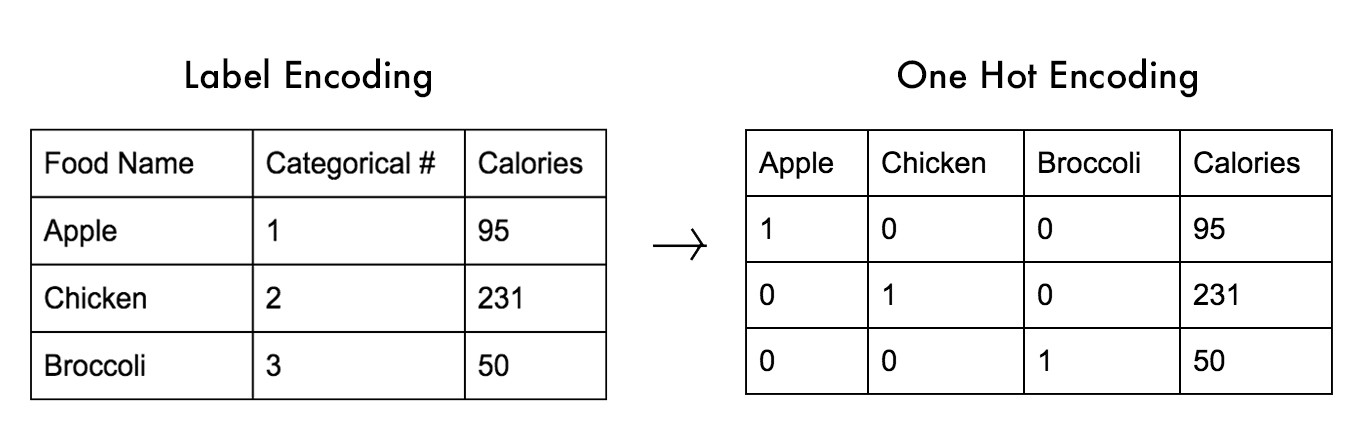

Source: https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179

In [42]:
# We produce dummy columns, using get_dummies function of pandas, that holds the one-hot encoded form of our dataset

single_option_columns_df_encoded=pd.get_dummies(single_option_columns_df4, drop_first=True)

single_option_columns_df_encoded  # Taking a look at the encoded dataset

,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,Q2_40-44,Q2_45-49,Q2_50-54,...,Q24_I have never written code but I want to learn,Q25_10-15 years,Q25_2-3 years,Q25_20+ years,Q25_3-4 years,Q25_4-5 years,Q25_5-10 years,Q25_< 1 year,Q25_I have never studied machine learning and I do not plan to,Q25_I have never studied machine learning but plan to learn in the future
index,,,,,,,,,,,,,,,,,,,,,
0.0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2.0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3.0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5.0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6.0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7.0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# As there are multiple columns for each category already for Multiple-options dataset, 
# we just impute 0 for missing values and 1 for non-missing values

multiple_options_columns_df_encoded=multiple_options_columns_df.copy()
for column in multiple_options_columns_df_encoded.columns:
    multiple_options_columns_df_encoded[column]=multiple_options_columns_df_encoded[column].apply(lambda x: 0 if pd.isnull(x) else 1)

In [44]:
multiple_options_columns_df_encoded # Taking a look at the encoded dataset

,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q13_Part_1,Q13_Part_2,Q13_Part_3,...,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16
index,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4.0,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5.0,0,1,1,0,0,0,0,1,0,1,...,0,1,1,0,0,0,0,0,0,0
6.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7.0,0,0,0,1,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
8.0,1,0,0,1,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,0


#### We concatenate both encoded dataframes together to get a single dataset with encoded form of categorical values

In [45]:
feature_data=pd.concat([single_option_columns_df_encoded,multiple_options_columns_df_encoded],axis=1,sort=False)

feature_data # Here, we formed out feature dataset

,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,Q2_40-44,Q2_45-49,Q2_50-54,...,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16
index,,,,,,,,,,,,,,,,,,,,,
0.0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2.0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,1,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
6.0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7.0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8.0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [46]:
target_data=pd.DataFrame(target)
target_data.Q9.unique()

array(['10-20,000', '0-10,000', '20-30,000', '125-150,000', '30-40,000',
       '50-60,000', '100-125,000', '90-100,000', '70-80,000', '80-90,000',
       '60-70,000', '400-500,000', '40-50,000', '150-200,000', '500,000+',
       '300-400,000', '200-250,000', '250-300,000'], dtype=object)

#### We do a final check using seaborn heatmap to see if there are any leftover null values in our feature dataset

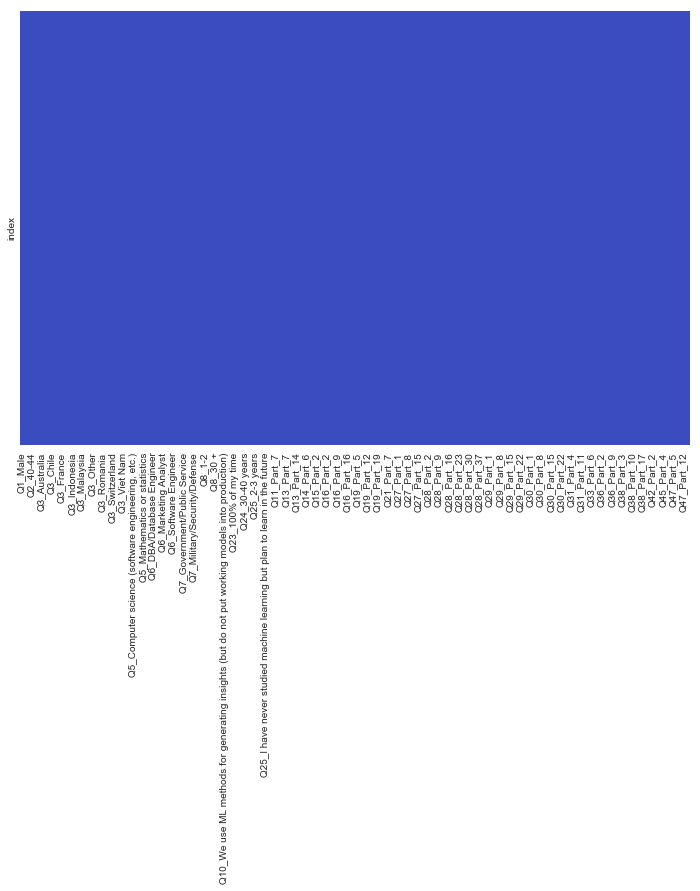

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(feature_data.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

#### As we finish cleaning our dataset, we conclude in this section to have formed our feature and target variables.
#### Now, we can begin to explore our datasets to find some insights

## Part B: Exploration of Data (Exploratory Data Analysis)

In [48]:
# For exploration, we create a new dataframe that includes the **un-encoded** part of the single-option dataset 
# and encoded part of multiple-option

df_exploration=pd.concat([target,single_option_columns_df4,multiple_options_columns_df_encoded],axis=1,sort=False)
df_exploration

,Q9,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16
index,,,,,,,,,,,,,,,,,,,,,
0.0,"10-20,000",Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,No (we do not use ML methods),...,0,0,0,0,0,0,0,0,0,0
1.0,"0-10,000",Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,I do not know,...,0,1,0,0,0,0,0,0,0,0
2.0,"0-10,000",Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,I do not know,...,0,0,0,0,0,0,0,0,0,0
3.0,"10-20,000",Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,No (we do not use ML methods),...,0,0,0,0,0,0,0,1,0,0
4.0,"0-10,000",Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"We recently started using ML methods (i.e., mo...",...,0,0,0,0,0,0,0,0,0,0
5.0,"20-30,000",Male,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3-4,"We have well established ML methods (i.e., mod...",...,0,1,1,0,0,0,0,0,0,0
6.0,"125-150,000",Male,40-44,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,Other,5-10,"We recently started using ML methods (i.e., mo...",...,0,0,0,0,0,0,0,1,0,0
7.0,"30-40,000",Male,25-29,France,Doctoral degree,Mathematics or statistics,Student,I am a student,0-1,"We have well established ML methods (i.e., mod...",...,0,1,0,0,0,0,0,0,0,0
8.0,"30-40,000",Male,25-29,United States of America,Bachelor’s degree,Mathematics or statistics,Research Assistant,Academics/Education,1-2,We are exploring ML methods (and may one day p...,...,0,1,0,1,0,0,0,0,0,0


### 1. Plotting of specific Questions against the count of Responders

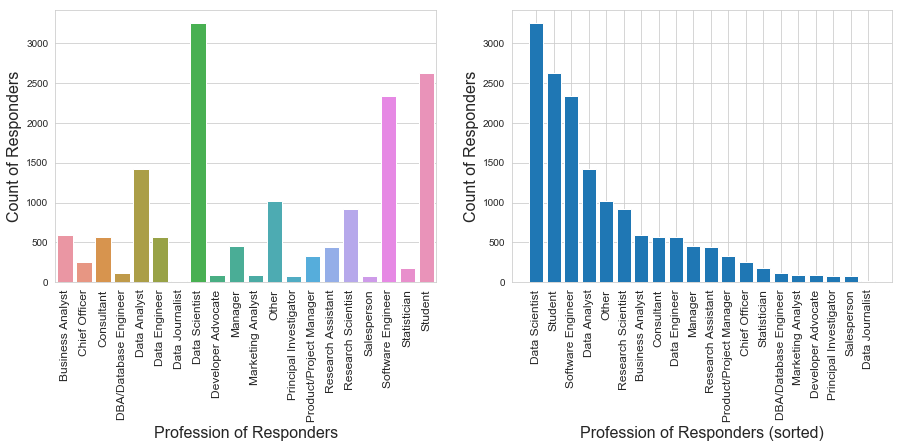

In [49]:
## Plot 1: Profession of Responders vs Count of Responders 

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

g_1=sns.countplot(x='Q6', data=df_exploration.sort_values(by=['Q6']),ax=ax1)

g_1.set_xticklabels(g_1.get_xticklabels(),rotation=90,fontsize=12)

g_1.set_xlabel("Profession of Responders",fontsize=16)
g_1.set_ylabel("Count of Responders",fontsize=16)

g1=pd.DataFrame(df_exploration.Q6.value_counts())

ax2.bar(x=g1.index,height=g1.Q6)

ax2.set_xlabel("Profession of Responders (sorted)",fontsize=16)
ax2.set_ylabel("Count of Responders",fontsize=16)
ax2.set_xticklabels(g1.index,rotation=90,fontsize=12)
plt.show()

**We observe that most of the survey responders were Data Scientists by profession followed by Students and Software Engineer**

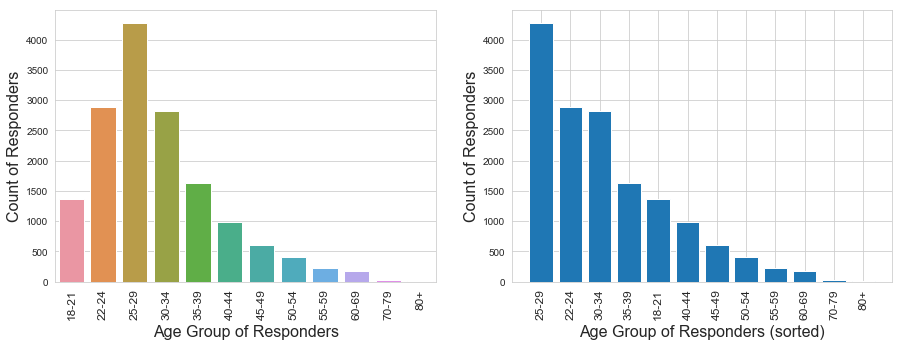

In [50]:
## Plot 2: Age-group of responders vs the Count of Responders

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

g_2=sns.countplot(x='Q2', data=df_exploration.sort_values(by=['Q2']),ax=ax1)

g_2.set_xticklabels(g_2.get_xticklabels(),rotation=90,fontsize=12)

g_2.set_xlabel("Age Group of Responders",fontsize=16)
g_2.set_ylabel("Count of Responders",fontsize=16)

g2=pd.DataFrame(df_exploration.Q2.value_counts())

ax2.bar(x=g2.index,height=g2.Q2)

ax2.set_xlabel("Age Group of Responders (sorted)",fontsize=16)
ax2.set_ylabel("Count of Responders",fontsize=16)
ax2.set_xticklabels(g2.index,rotation=90,fontsize=12)
plt.show()

**Most of the responders belonged to the age group of 25-29 followed by 22-24 and 30-34. This shows a relatively bigger section of young people is involved in Data Science**

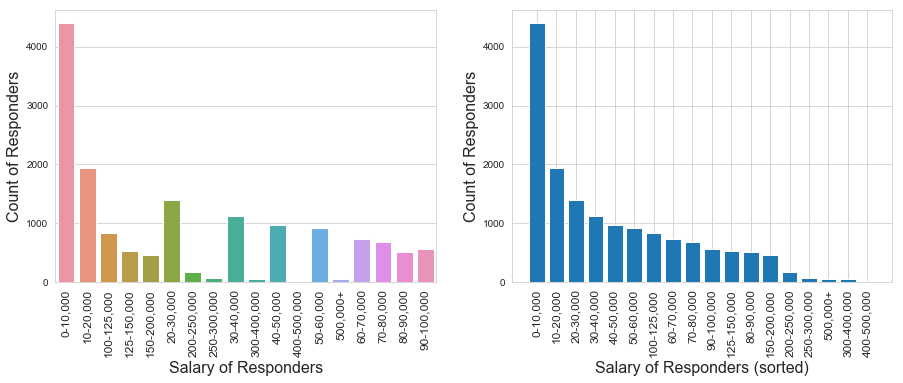

In [51]:
## Plot 3: Salary of Responders vs Count of Responders

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

g_3=sns.countplot(x='Q9', data=df_exploration.sort_values(by=['Q9']),ax=ax1)

g_3.set_xticklabels(g_3.get_xticklabels(),rotation=90,fontsize=12)

g_3.set_xlabel("Salary of Responders",fontsize=16)
g_3.set_ylabel("Count of Responders",fontsize=16)

g3=pd.DataFrame(df_exploration.Q9.value_counts())

ax2.bar(x=g3.index,height=g3.Q9)

ax2.set_xlabel("Salary of Responders (sorted)",fontsize=16)
ax2.set_ylabel("Count of Responders",fontsize=16)
ax2.set_xticklabels(g3.index,rotation=90,fontsize=12)
plt.show()

**A huge chunk of the surveyors have the lowest salary bracket of 0-10,000 USD. This is followed by the other two lowest categories which are 10-20,000 and 30-40,000 USD**

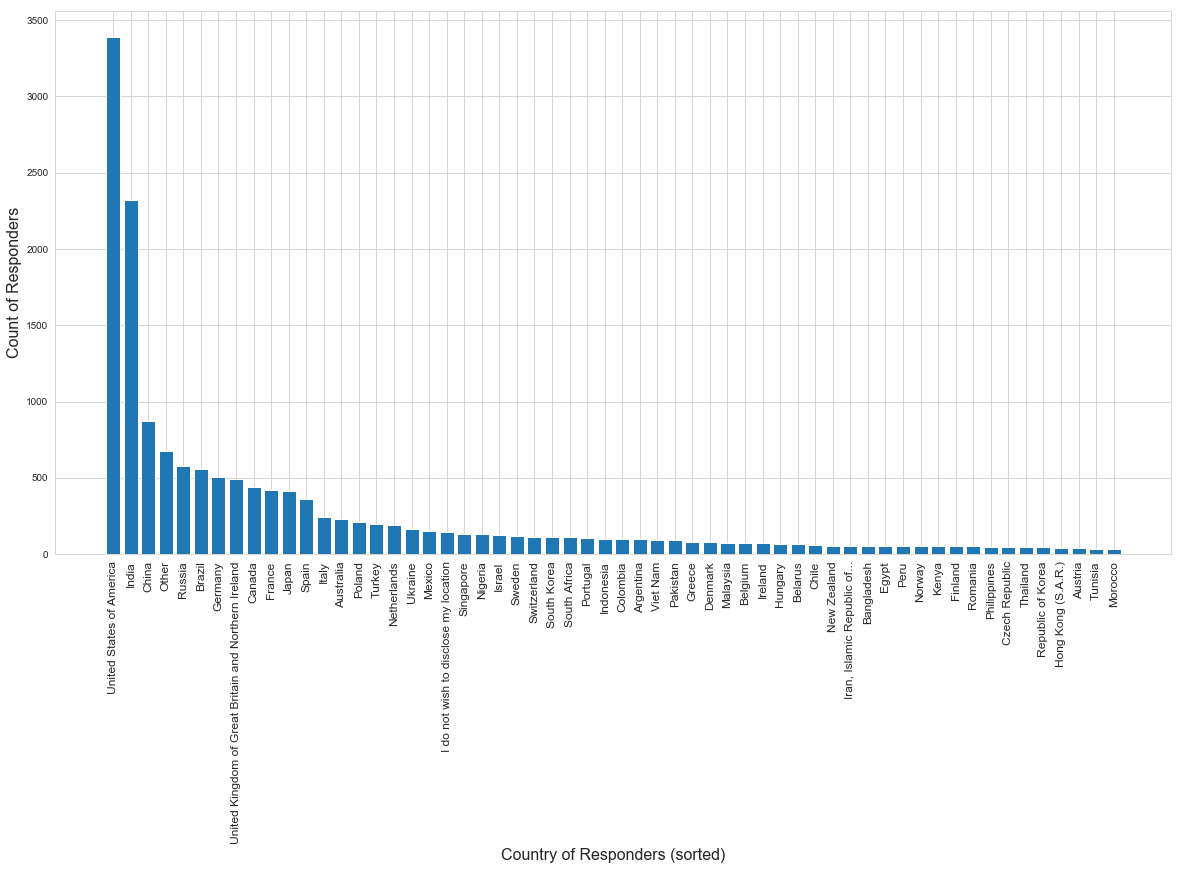

In [52]:
## Plot 4: Country of Responders vs Count of Responders

fig, (ax) = plt.subplots(1,1, figsize=(20,10))

g4=pd.DataFrame(df_exploration.Q3.value_counts())

ax.bar(x=g4.index,height=g4.Q3)

ax.set_xlabel("Country of Responders (sorted)",fontsize=16)
ax.set_ylabel("Count of Responders",fontsize=16)
ax.set_xticklabels(g4.index,rotation=90,fontsize=12)
plt.show()

**The biggest portion of responders are from USA followed by India and China**

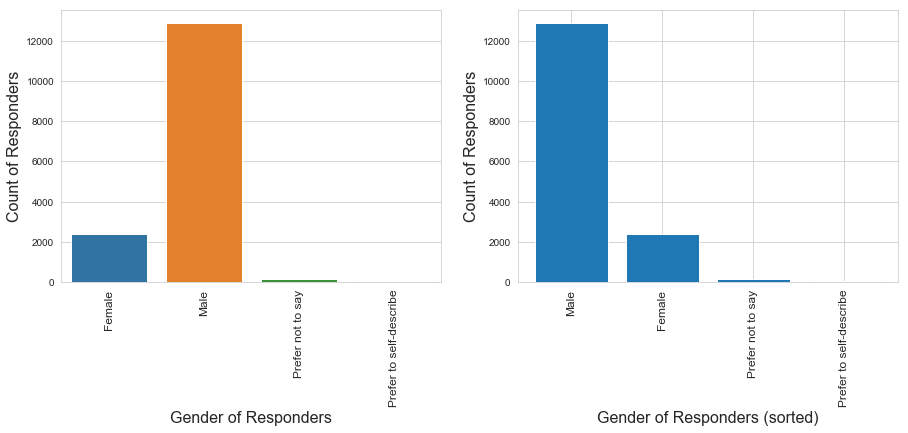

In [53]:
## Plot 5: Gender of Responders vs Count of Responders

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

g_5=sns.countplot(x='Q1', data=df_exploration.sort_values(by=['Q1']),ax=ax1)

g_5.set_xticklabels(g_5.get_xticklabels(),rotation=90,fontsize=12)

g_5.set_xlabel("Gender of Responders",fontsize=16)
g_5.set_ylabel("Count of Responders",fontsize=16)

g5=pd.DataFrame(df_exploration.Q1.value_counts())

ax2.bar(x=g5.index,height=g5.Q1)

ax2.set_xlabel("Gender of Responders (sorted)",fontsize=16)
ax2.set_ylabel("Count of Responders",fontsize=16)
ax2.set_xticklabels(g5.index,rotation=90,fontsize=12)
plt.show()

**The lion's share of our surveyors were Males and only a small fraction were Females. This shows a huge disparity amongst the genders in the Data Science field**

### 2. Plotting of same Questions against the count of Responders for the three lowest salary brackets

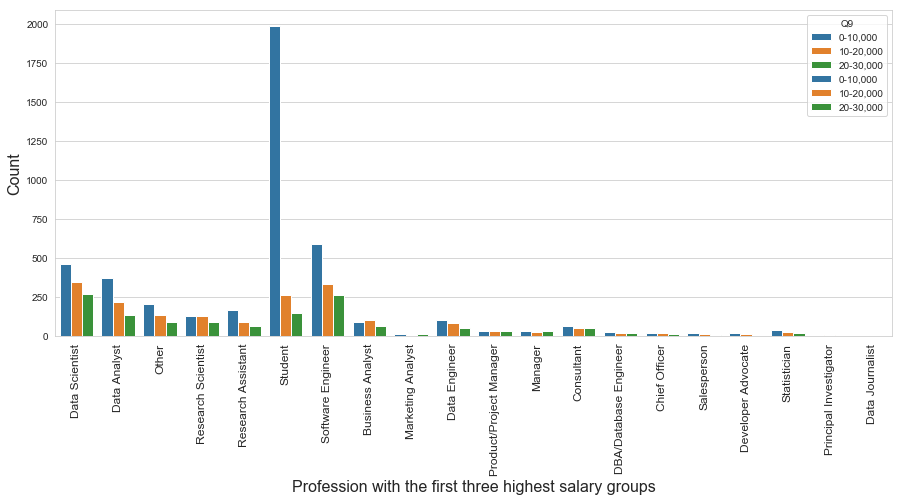

In [54]:
## Plot 1: Profession vs Count for three lowest Salary brackets

eda_df1=df_exploration[['Q9','Q6']].groupby('Q9',as_index=False)

eda_df1=pd.concat([eda_df1.get_group('0-10,000'),eda_df1.get_group('10-20,000'),eda_df1.get_group('20-30,000')],axis=0,sort=False)

f, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='Q6',hue='Q9', data=eda_df1)

e_1=sns.countplot(x='Q6',hue='Q9', data=eda_df1)

e_1.set_xticklabels(e_1.get_xticklabels(),rotation=90,fontsize=12)

e_1.set_xlabel("Profession with the first three highest salary groups",fontsize=16)
e_1.set_ylabel("Count",fontsize=16)
plt.show()

**We find that people with the lowest 0-10,000 USD Salary are mostly Students**

**The next 10-20,000 and 20-30,000 USD category has almost same count for Data Scientists, Students and Software Engineers**

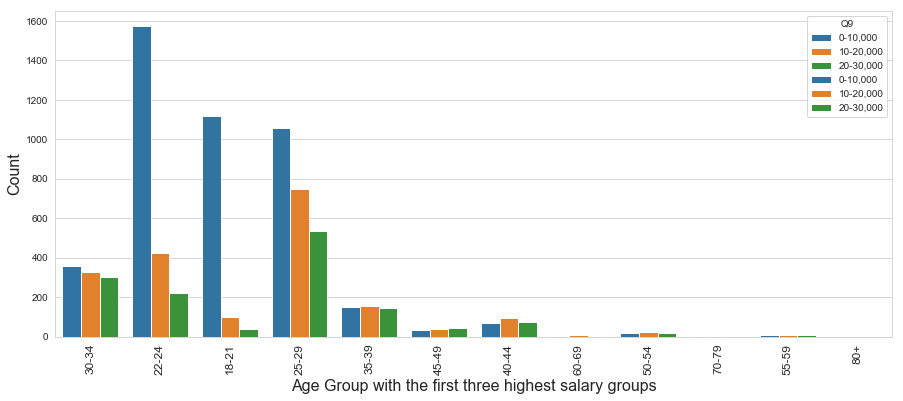

In [55]:
## PLot 2: Age-group vs Count for the lowest three Salary brackets

eda_df2=df_exploration[['Q9','Q2']].groupby('Q9',as_index=False)

eda_df2=pd.concat([eda_df2.get_group('0-10,000'),eda_df2.get_group('10-20,000'),eda_df2.get_group('20-30,000')],axis=0,sort=False)

f, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='Q2',hue='Q9', data=eda_df2)

e_2=sns.countplot(x='Q2',hue='Q9', data=eda_df2)

e_2.set_xticklabels(e_2.get_xticklabels(),rotation=90,fontsize=12)

e_2.set_xlabel("Age Group with the first three highest salary groups",fontsize=16)
e_2.set_ylabel("Count",fontsize=16)
plt.show()

**As the group 22-24 dominates the lowest salary bracket, however age group of 25-29 dominates the next two salary brackets**

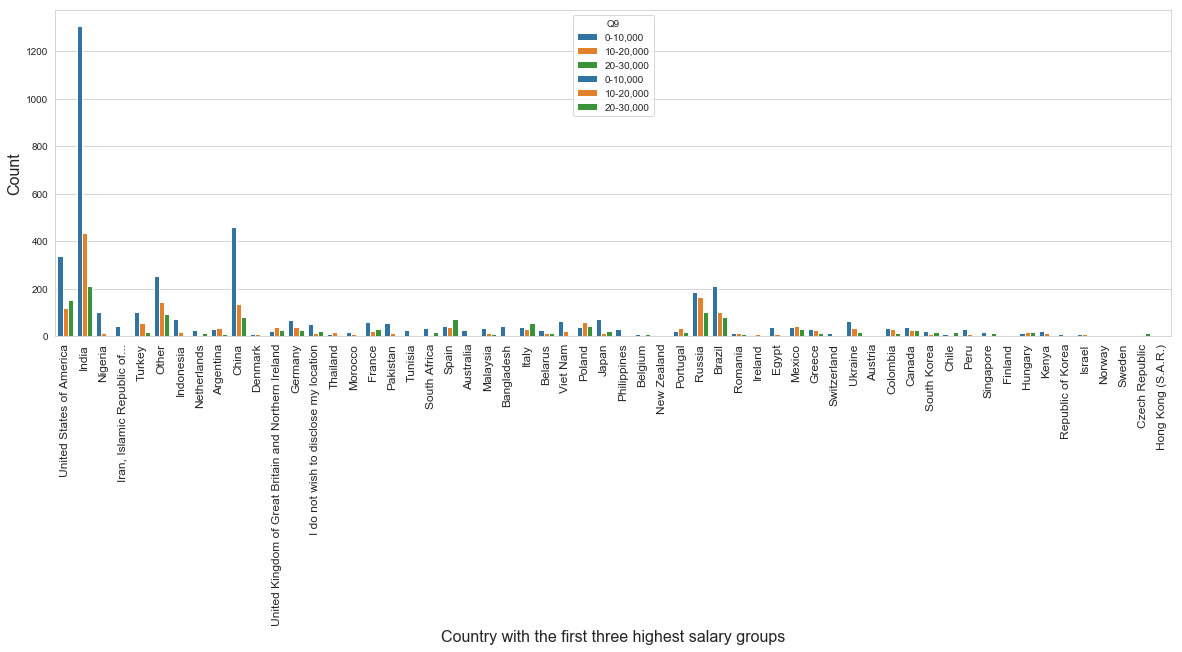

In [56]:
## Plot 3: Country vs Count for each of the three lowest salary brackets

eda_df3=df_exploration[['Q9','Q3']].groupby('Q9',as_index=False)

eda_df3=pd.concat([eda_df3.get_group('0-10,000'),eda_df3.get_group('10-20,000'),eda_df3.get_group('20-30,000')],axis=0,sort=False)

f, ax = plt.subplots(figsize=(20,6))
sns.countplot(x='Q3',hue='Q9', data=eda_df3)

e_3=sns.countplot(x='Q3',hue='Q9', data=eda_df3)

e_3.set_xticklabels(e_3.get_xticklabels(),rotation=90,fontsize=12)

e_3.set_xlabel("Country with the first three highest salary groups",fontsize=16)
e_3.set_ylabel("Count",fontsize=16)
plt.show()

**We find that India has the highest count in each of the three lowest salary brackets. The same is followed by China and USA**

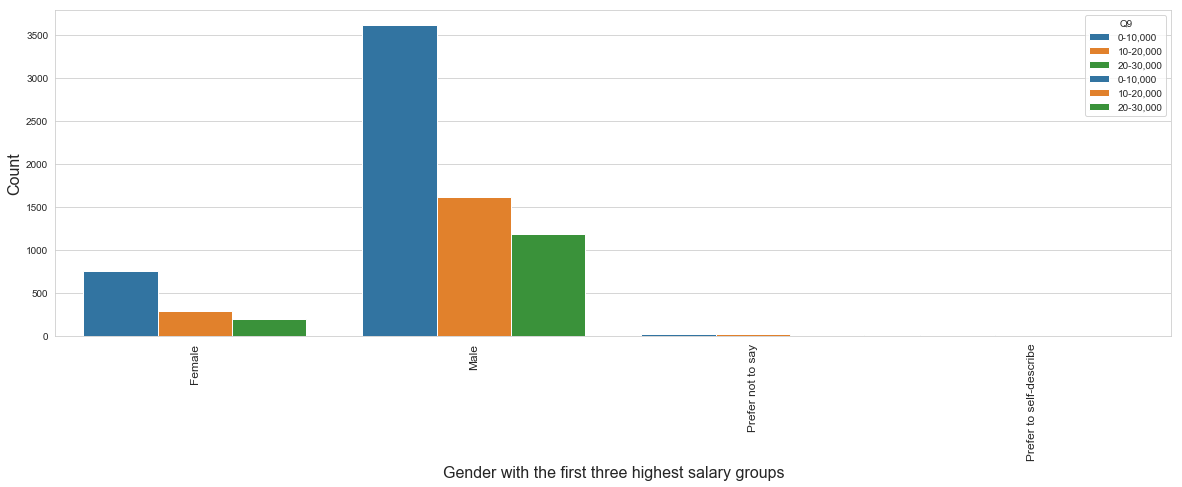

In [57]:
## Plot 4: Gender vs Count for the lowest three Salary brackets

eda_df4=df_exploration[['Q9','Q1']].groupby('Q9',as_index=False)

eda_df4=pd.concat([eda_df4.get_group('0-10,000'),eda_df4.get_group('10-20,000'),eda_df4.get_group('20-30,000')],axis=0,sort=False)

f, ax = plt.subplots(figsize=(20,6))
sns.countplot(x='Q1',hue='Q9', data=eda_df4)

e_4=sns.countplot(x='Q1',hue='Q9', data=eda_df4)

e_4.set_xticklabels(e_4.get_xticklabels(),rotation=90,fontsize=12)

e_4.set_xlabel("Gender with the first three highest salary groups",fontsize=16)
e_4.set_ylabel("Count",fontsize=16)
plt.show()

**Again, we see that Males have a higher proportion in each of the three categories than Females**

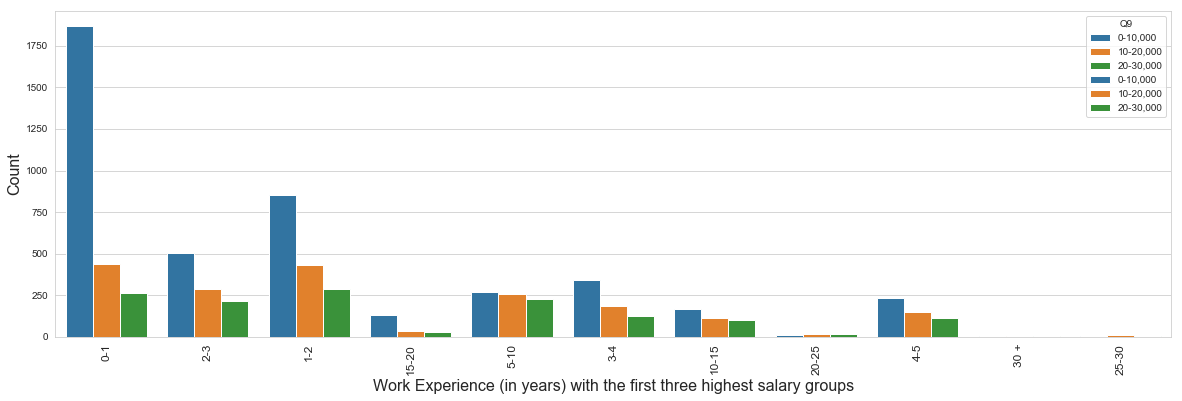

In [58]:
## Plot 5: Work Experience Vs Count for the lowest three Salary brackets

eda_df5=df_exploration[['Q9','Q8']].groupby('Q9',as_index=False)

eda_df5=pd.concat([eda_df5.get_group('0-10,000'),eda_df5.get_group('10-20,000'),eda_df5.get_group('20-30,000')],axis=0,sort=False)

f, ax = plt.subplots(figsize=(20,6))
sns.countplot(x='Q8',hue='Q9', data=eda_df5)

e_5=sns.countplot(x='Q8',hue='Q9', data=eda_df5)

e_5.set_xticklabels(e_5.get_xticklabels(),rotation=90,fontsize=12)

e_5.set_xlabel("Work Experience (in years) with the first three highest salary groups",fontsize=16)
e_5.set_ylabel("Count",fontsize=16)
plt.show()

**As expected, as the surveyors are relatively less experienced (0-3 years), a large fraction of them falls in either of the three lowest categories**

### Below table shows the dominant categories of Gender, Age, Country, Current Job Role and Experience for Salaries in low-income bins i.e. (0-10k, 10-20k & 20-30k) in a tabular format

<table>
  <thead>
    <tr>
      <th>Salary ($/year)</th>
      <th>Gender</th>
      <th>Age (in years)</th>
      <th>Country</th>
      <th>Current Job Role</th>
      <th>Experience (in years)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0-10,000</td>
      <td>Male</td>
      <td>22-24</td>
      <td>India</td>
      <td>Student</td>
      <td>0-1</td>    
    </tr>
    <tr>
      <td>10-20,000</td>
      <td>Male</td>
      <td>25-29</td>
      <td>India</td>
      <td>Data Scientist / Software Engineer</td>
      <td>0-1 / 1-2</td> 
    </tr>
    <tr>
      <td>20-30,000</td>
      <td>Male</td>
      <td>25-29</td>
      <td>India</td>
      <td>Data Scientist / Software Engineer</td>
      <td>0-1 / 1-2</td>
    </tr>  
  </tbody>
</table>

**This table is derived from the graphs plotted above and represent that the majority of low-income group are Males from India in the age group of 22-29 years and with work experience of 0-2 years.** 
**A huge share of their current job role is 'Student' while the smaller share is either 'Data Scientist' or 'Software Engineer'**

**Also, a reason of their relatively low salaries could be due to the high currency exchange factor (from Rupee to Dollar)**

### 3. Finding features that would be useful to model against our target (Salary)

In [59]:
## For finding such features, we will encode the Salary as graphs need to be plot against a numerical value

df_exploration_Numerical_Salary=df_exploration.copy()

# Creating new column to store numerical value of Salary
df_exploration_Numerical_Salary['Q9 in numerical']=df_exploration_Numerical_Salary['Q9']
df_exploration_Numerical_Salary['Q9 in numerical'].unique()

array(['10-20,000', '0-10,000', '20-30,000', '125-150,000', '30-40,000',
       '50-60,000', '100-125,000', '90-100,000', '70-80,000', '80-90,000',
       '60-70,000', '400-500,000', '40-50,000', '150-200,000', '500,000+',
       '300-400,000', '200-250,000', '250-300,000'], dtype=object)

In [60]:
# Converting to array to encode the data easily
df_exploration_Numerical_Salary_np=np.array(df_exploration_Numerical_Salary['Q9 in numerical'])
df_exploration_Numerical_Salary_np

# Encoding here based on the Salary bracket (such as 0-10,000 : 10 ,10-20,000 : 20 and so on)
for i in range(len(df_exploration_Numerical_Salary_np)):
    if df_exploration_Numerical_Salary_np[i]=='0-10,000':
        df_exploration_Numerical_Salary_np[i]=10
    elif df_exploration_Numerical_Salary_np[i]=='10-20,000':
        df_exploration_Numerical_Salary_np[i]=20
    elif df_exploration_Numerical_Salary_np[i]=='20-30,000':
        df_exploration_Numerical_Salary_np[i]=30
    elif df_exploration_Numerical_Salary_np[i]=='30-40,000':
        df_exploration_Numerical_Salary_np[i]=40 
    elif df_exploration_Numerical_Salary_np[i]=='40-50,000':
        df_exploration_Numerical_Salary_np[i]=50 
    elif df_exploration_Numerical_Salary_np[i]=='50-60,000':
        df_exploration_Numerical_Salary_np[i]=60 
    elif df_exploration_Numerical_Salary_np[i]=='60-70,000':
        df_exploration_Numerical_Salary_np[i]=70 
    elif df_exploration_Numerical_Salary_np[i]=='70-80,000':
        df_exploration_Numerical_Salary_np[i]=80 
    elif df_exploration_Numerical_Salary_np[i]=='80-90,000':
        df_exploration_Numerical_Salary_np[i]=90 
    elif df_exploration_Numerical_Salary_np[i]=='90-100,000':
        df_exploration_Numerical_Salary_np[i]=100 
    elif df_exploration_Numerical_Salary_np[i]=='100-125,000':
        df_exploration_Numerical_Salary_np[i]=125 
    elif df_exploration_Numerical_Salary_np[i]=='125-150,000':
        df_exploration_Numerical_Salary_np[i]=150 
    elif df_exploration_Numerical_Salary_np[i]=='150-200,000':
        df_exploration_Numerical_Salary_np[i]=200    
    elif df_exploration_Numerical_Salary_np[i]=='200-250,000':
        df_exploration_Numerical_Salary_np[i]=250
    elif df_exploration_Numerical_Salary_np[i]=='250-300,000':
        df_exploration_Numerical_Salary_np[i]=300 
    elif df_exploration_Numerical_Salary_np[i]=='300-400,000':
        df_exploration_Numerical_Salary_np[i]=400 
    elif df_exploration_Numerical_Salary_np[i]=='400-500,000':
        df_exploration_Numerical_Salary_np[i]=500
    elif df_exploration_Numerical_Salary_np[i]=='500,000+':
        df_exploration_Numerical_Salary_np[i]=600    

In [61]:
df_exploration_Numerical_Salary['Q9 in numerical']=df_exploration_Numerical_Salary_np
df_exploration_Numerical_Salary

## Checking to see if encoding has been executed

,Q9,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16,Q9 in numerical
index,,,,,,,,,,,,,,,,,,,,,
0.0,"10-20,000",Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,No (we do not use ML methods),...,0,0,0,0,0,0,0,0,0,20
1.0,"0-10,000",Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,I do not know,...,1,0,0,0,0,0,0,0,0,10
2.0,"0-10,000",Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,I do not know,...,0,0,0,0,0,0,0,0,0,10
3.0,"10-20,000",Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,No (we do not use ML methods),...,0,0,0,0,0,0,1,0,0,20
4.0,"0-10,000",Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"We recently started using ML methods (i.e., mo...",...,0,0,0,0,0,0,0,0,0,10
5.0,"20-30,000",Male,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3-4,"We have well established ML methods (i.e., mod...",...,1,1,0,0,0,0,0,0,0,30
6.0,"125-150,000",Male,40-44,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,Other,5-10,"We recently started using ML methods (i.e., mo...",...,0,0,0,0,0,0,1,0,0,150
7.0,"30-40,000",Male,25-29,France,Doctoral degree,Mathematics or statistics,Student,I am a student,0-1,"We have well established ML methods (i.e., mod...",...,1,0,0,0,0,0,0,0,0,40
8.0,"30-40,000",Male,25-29,United States of America,Bachelor’s degree,Mathematics or statistics,Research Assistant,Academics/Education,1-2,We are exploring ML methods (and may one day p...,...,1,0,1,0,0,0,0,0,0,40


In [62]:
# Converting the type to float here

df_exploration_Numerical_Salary['Q9 in numerical']=df_exploration_Numerical_Salary['Q9 in numerical'].astype(float)

#### We create boxplots now to see the distribution of each category of a particular column with Salary

Box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles

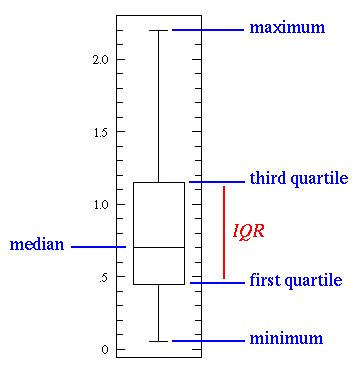

Source: http://www.physics.csbsju.edu/stats/box2.html

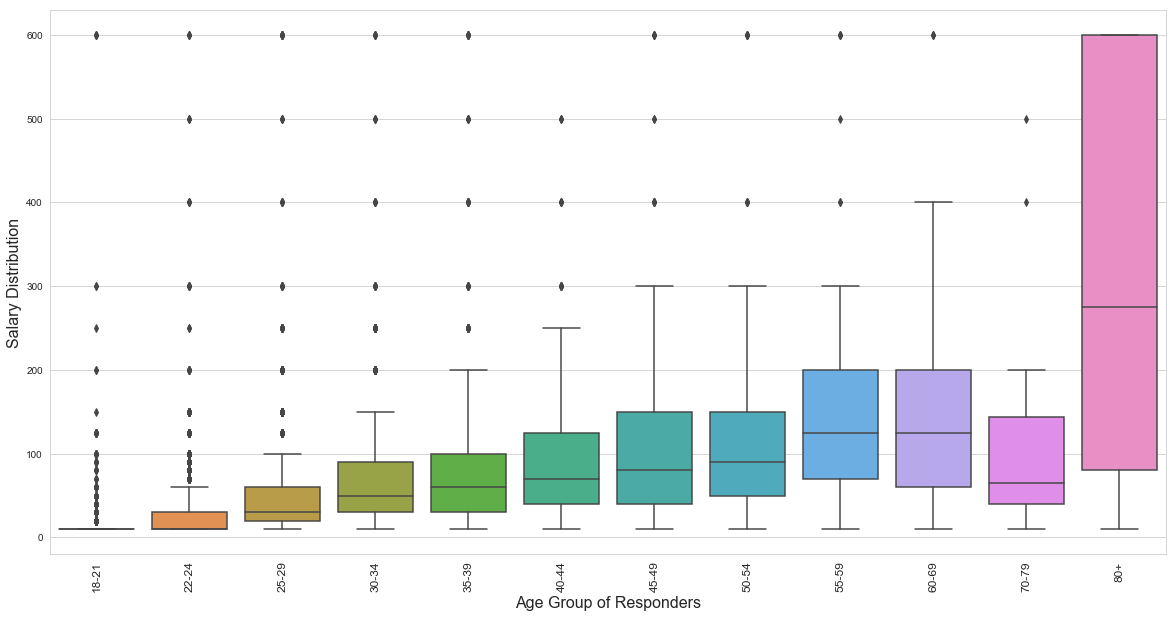

In [63]:
# BoxPlot 1: Age-Group vs Salary Distribution

fig, (ax) = plt.subplots(1,1, figsize=(20,10))

ax=sns.boxplot(y='Q9 in numerical' , x='Q2', data=df_exploration_Numerical_Salary.sort_values(by=['Q2']))

ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=12)

ax.set_xlabel("Age Group of Responders",fontsize=16)
ax.set_ylabel("Salary Distribution",fontsize=16)
plt.show()

As we can see that the spread (position of each quartile) of each age group varies to other age groups, this feature **can contribute** in modeling. The variation itself is highly varied and the variation increases with the age; the highest variation being observed in 80+ age group.

Also, some of the responders in particular age groups have salary greater than 500k+. While these could act as outliers and affect the model, we will overlook them for now.

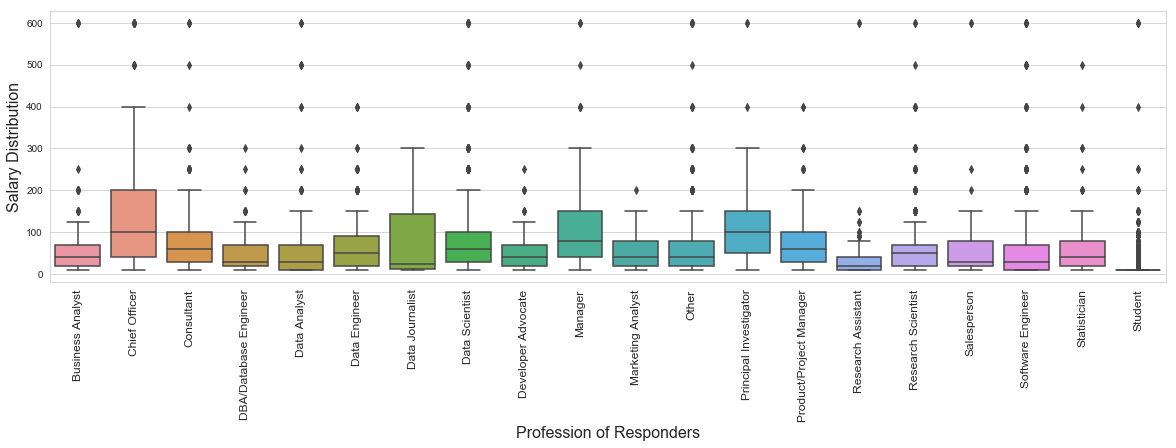

In [64]:
# BoxPlot 2: Profession vs Salary Distribution

fig, (ax) = plt.subplots(1,1, figsize=(20,5))

ax=sns.boxplot(y='Q9 in numerical' , x='Q6', data=df_exploration_Numerical_Salary.sort_values(by=['Q6']))

ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=12)

ax.set_xlabel("Profession of Responders",fontsize=16)
ax.set_ylabel("Salary Distribution",fontsize=16)
plt.show()

In this graph, we see that the spread (position of each quartile) of each profession does't vary much, thus this feature **may not** contribute much in modeling. Regardless, we will keep it for now even if it slighlty affects the model

And similary in this feature too, some of the responders in particular professions have salary greater than 500k+. These could act as outliers and affect the model; but we will overlook them.

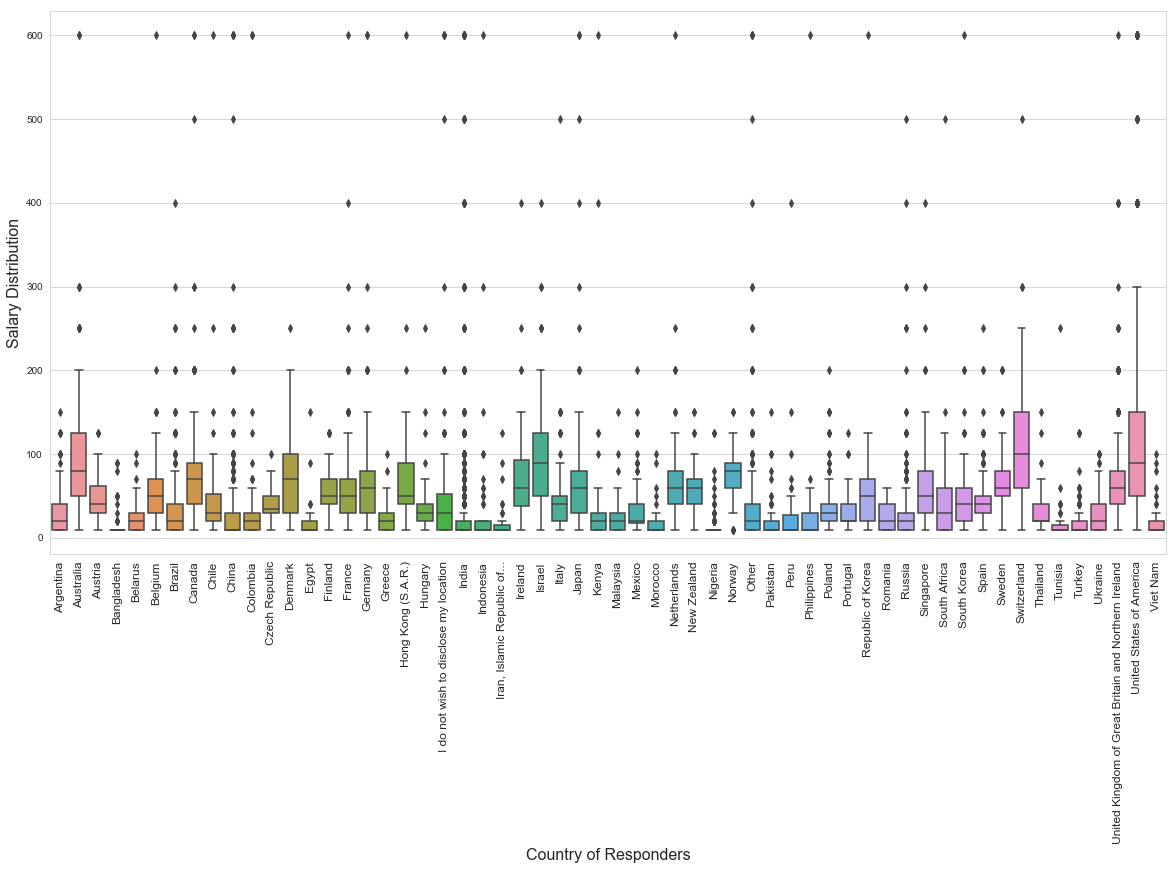

In [65]:
# BoxPlot 3: Country vs Salary Distribution

fig, (ax) = plt.subplots(1,1, figsize=(20,10))

ax=sns.boxplot(y='Q9 in numerical' , x='Q3', data=df_exploration_Numerical_Salary.sort_values(by=['Q3']))

ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=12)

ax.set_xlabel("Country of Responders",fontsize=16)
ax.set_ylabel("Salary Distribution",fontsize=16)
plt.show()

Same as the previous graph, we see that the spread (position of each quartile) of each age group does't vary much, thus this feature **may not** contribute much in modeling. Regardless, we will keep it for now even if it slighlty affects the model

And similary in this feature too, some of the responders in particular professions have salary greater than 500k+. These could act as outliers and affect the model; but we will overlook them

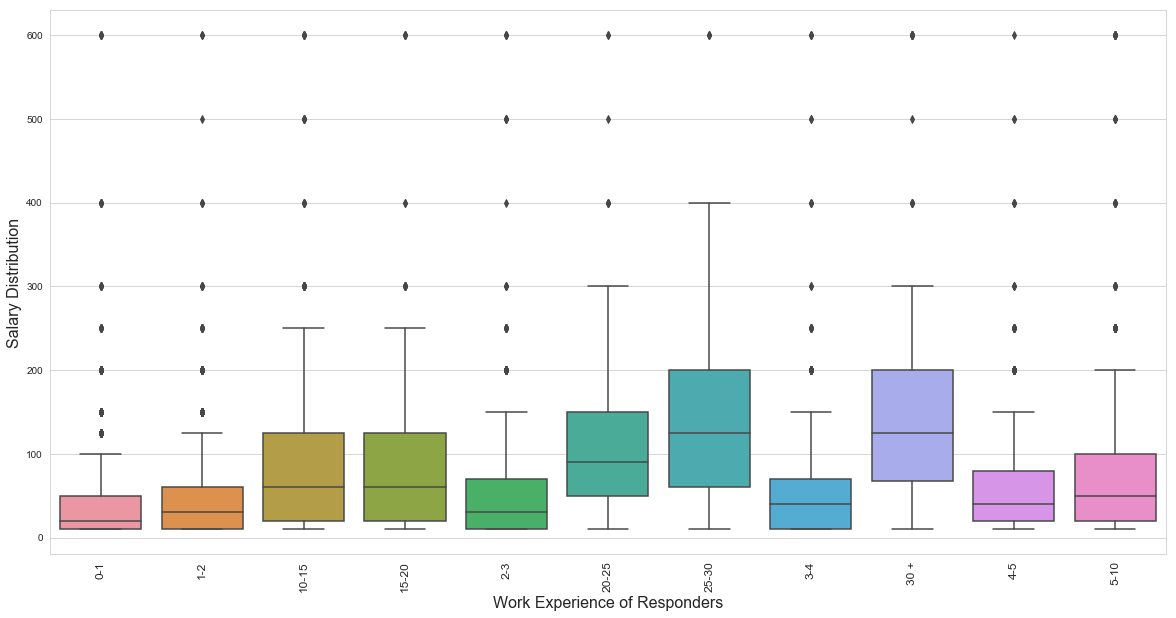

In [66]:
# BoxPlot 4: Work Experience vs Salary Distribution

fig, (ax) = plt.subplots(1,1, figsize=(20,10))

ax=sns.boxplot(y='Q9 in numerical' , x='Q8', data=df_exploration_Numerical_Salary.sort_values(by=['Q8']))

ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=12)

ax.set_xlabel("Work Experience of Responders",fontsize=16)
ax.set_ylabel("Salary Distribution",fontsize=16)
plt.show()

In this graph, we see that the spread (position of each quartile) of each group varies slightly than the other, thus this feature **can slightly** contribute in modeling. Thus, we will keep it for now even if it slighlty affects the model

And similary in this too, some of the responders in particular professions have salary greater than 500k+. These could act as outliers and affect the model; but we will overlook them

In [67]:
# Checking to see how many rows are there with Salary greater than 500k+

print (single_option_columns_df[single_option_columns_df['Q9']=='500,000+']['Q9'].count())

63


**We have 63 possible values of Salary greater than 500k+ which can act as outliers and alter the model. These 63 values are out of 15000 rows and so the affect on the model would be minimal if any. Thus, we keep these rows and build our model**

### 4. Searching for correlation between all single-option questions vs Salary using .corr function

In [68]:
df_exploration_Numerical_Salary_copy=df_exploration_Numerical_Salary.copy()
df_exploration_Numerical_Salary_copy

,Q9,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16,Q9 in numerical
index,,,,,,,,,,,,,,,,,,,,,
0.0,"10-20,000",Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,No (we do not use ML methods),...,0,0,0,0,0,0,0,0,0,20.0
1.0,"0-10,000",Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,I do not know,...,1,0,0,0,0,0,0,0,0,10.0
2.0,"0-10,000",Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,I do not know,...,0,0,0,0,0,0,0,0,0,10.0
3.0,"10-20,000",Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,No (we do not use ML methods),...,0,0,0,0,0,0,1,0,0,20.0
4.0,"0-10,000",Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"We recently started using ML methods (i.e., mo...",...,0,0,0,0,0,0,0,0,0,10.0
5.0,"20-30,000",Male,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3-4,"We have well established ML methods (i.e., mod...",...,1,1,0,0,0,0,0,0,0,30.0
6.0,"125-150,000",Male,40-44,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,Other,5-10,"We recently started using ML methods (i.e., mo...",...,0,0,0,0,0,0,1,0,0,150.0
7.0,"30-40,000",Male,25-29,France,Doctoral degree,Mathematics or statistics,Student,I am a student,0-1,"We have well established ML methods (i.e., mod...",...,1,0,0,0,0,0,0,0,0,40.0
8.0,"30-40,000",Male,25-29,United States of America,Bachelor’s degree,Mathematics or statistics,Research Assistant,Academics/Education,1-2,We are exploring ML methods (and may one day p...,...,1,0,1,0,0,0,0,0,0,40.0


In [69]:
# Here we did Label Encoding of all Questions and stores the same in our dataset

df_exploration_Numerical_Salary_copy['Salary'] = pd.factorize(df_exploration_Numerical_Salary_copy.Q9)[0]
df_exploration_Numerical_Salary_copy['Gender'] = pd.factorize(df_exploration_Numerical_Salary_copy.Q1)[0]
df_exploration_Numerical_Salary_copy['Age'] = pd.factorize(df_exploration_Numerical_Salary_copy.Q2)[0]
df_exploration_Numerical_Salary_copy['Country'] = pd.factorize(df_exploration_Numerical_Salary_copy.Q3)[0]
df_exploration_Numerical_Salary_copy['Education'] = pd.factorize(df_exploration_Numerical_Salary_copy.Q4)[0]
df_exploration_Numerical_Salary_copy['UG_Major'] = pd.factorize(df_exploration_Numerical_Salary_copy.Q5)[0]
df_exploration_Numerical_Salary_copy['Job_Role'] = pd.factorize(df_exploration_Numerical_Salary_copy.Q6)[0]
df_exploration_Numerical_Salary_copy['Industry'] = pd.factorize(df_exploration_Numerical_Salary_copy.Q7)[0]
df_exploration_Numerical_Salary_copy['Experience_in_Role'] = pd.factorize(df_exploration_Numerical_Salary_copy.Q8)[0]
df_exploration_Numerical_Salary_copy['ML_Incorporated'] = pd.factorize(df_exploration_Numerical_Salary_copy.Q10)[0]
df_exploration_Numerical_Salary_copy['Tool'] = pd.factorize(df_exploration_Numerical_Salary_copy.Q12_MULTIPLE_CHOICE)[0]
df_exploration_Numerical_Salary_copy['Percent_of_Time_in_Coding'] = pd.factorize(df_exploration_Numerical_Salary_copy.Q23)[0]
df_exploration_Numerical_Salary_copy['Years_Writing_Code'] = pd.factorize(df_exploration_Numerical_Salary_copy.Q24)[0]
df_exploration_Numerical_Salary_copy['Years_Using_ML'] = pd.factorize(df_exploration_Numerical_Salary_copy.Q25)[0]

df_exploration_Numerical_Salary_copy # Check in the last columns if Label encoding executed properly

,Q9,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Education,UG_Major,Job_Role,Industry,Experience_in_Role,ML_Incorporated,Tool,Percent_of_Time_in_Coding,Years_Writing_Code,Years_Using_ML
index,,,,,,,,,,,,,,,,,,,,,
0.0,"10-20,000",Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,No (we do not use ML methods),...,0,0,0,0,0,0,0,0,0,0
1.0,"0-10,000",Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,I do not know,...,1,1,1,1,1,1,1,1,1,1
2.0,"0-10,000",Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,I do not know,...,1,2,2,1,1,1,2,1,1,2
3.0,"10-20,000",Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,No (we do not use ML methods),...,2,3,0,2,2,0,0,2,2,1
4.0,"0-10,000",Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"We recently started using ML methods (i.e., mo...",...,1,3,0,3,1,2,1,1,2,1
5.0,"20-30,000",Male,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3-4,"We have well established ML methods (i.e., mod...",...,1,0,3,4,3,3,1,1,3,1
6.0,"125-150,000",Male,40-44,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,Other,5-10,"We recently started using ML methods (i.e., mo...",...,1,0,1,3,0,2,3,1,1,3
7.0,"30-40,000",Male,25-29,France,Doctoral degree,Mathematics or statistics,Student,I am a student,0-1,"We have well established ML methods (i.e., mod...",...,2,2,4,1,1,3,4,2,3,4
8.0,"30-40,000",Male,25-29,United States of America,Bachelor’s degree,Mathematics or statistics,Research Assistant,Academics/Education,1-2,We are exploring ML methods (and may one day p...,...,0,2,5,2,4,4,1,3,4,4


Text(0.5, 1.0, 'Correlation Map of Some Potential Features with Salary')

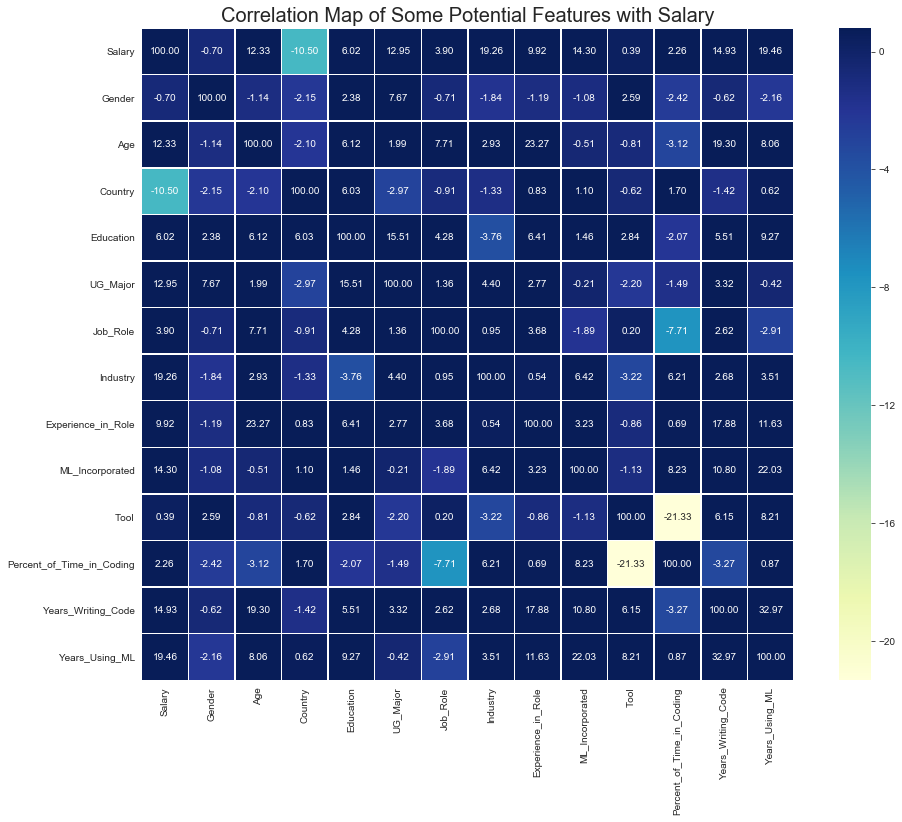

In [70]:
corr=df_exploration_Numerical_Salary_copy.iloc[:,-14:].corr()*100   # Fitting correlation function in the encoded columns

# Using SNS Heatmap function to visualize the correlation for better readability
fig, ax=plt.subplots(figsize=(16, 12))
ax=sns.heatmap(corr, vmax=.8, square=True, linewidths=.5, annot=True, fmt='.2f', cmap="YlGnBu")
plt.title('Correlation Map of Some Potential Features with Salary', size=20)

#### Almost all column features are corelated (in a certin degree) with Salary except for Q1 and Q12_MULTIPLE_CHOICE which have corelation value of almost 0. We get 'Years with ML' i.e. Q25 as most corelated (19.45%) which is followed by Industry (Q7 - 19.26%), Years in Coding (Q24 - 14.93%), and so on.

#### However, since there is a weight associated with the categories in each of these features (through label encoding), this may not be a true reflection of correlation of features which will impact our model (and to that corresponding degree). Hence, we move on to Feature Selection

# Part C: Feature Selection

### 1. Feature Selection through Lasso Regression

In [71]:
target=df_exploration_Numerical_Salary_copy['Q9 in numerical']

col_feat=feature_data.columns  # Column names extracted and stored in col_feat

feature_data.head()

,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,Q2_40-44,Q2_45-49,Q2_50-54,...,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16
index,,,,,,,,,,,,,,,,,,,,,
0.0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2.0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
target_merged=target.copy()

target_merged.groupby(target_merged).count()  # Taking the count of rows of each Salary category

Q9 in numerical
10.0     4396
20.0     1936
30.0     1394
40.0     1119
50.0      964
60.0      919
70.0      729
80.0      677
90.0      506
100.0     566
125.0     843
150.0     533
200.0     457
250.0     172
300.0      75
400.0      52
500.0      23
600.0      63
Name: Q9 in numerical, dtype: int64

**We can see that the count varies greatly across the categories. While there is sufficient number of rows for modeling 0-10,000; there are only 63 rows to model 500k+ category**

**So, we will merge categories together so that each category has a sufficient count (approx. 1500) to model**

In [73]:
# Encoding the values here to merge categories

target_merged[target_merged<=10]=10
target_merged[((target_merged>=20) & (target_merged<=20))]=20
target_merged[(target_merged>=30) & (target_merged<=30)]=30
target_merged[(target_merged>=40) & (target_merged<=50)]=50
target_merged[(target_merged>=60) & (target_merged<=70)]=70
target_merged[(target_merged>=80) & (target_merged<=100)]=100
# target_merged[(target_merged>=100) & (target_merged<=125)]=125
target_merged[(target_merged>=125)]=500

In [74]:
target_merged.groupby(target_merged).count()  # Observe the count now after encoding

Q9 in numerical
10.0     4396
20.0     1936
30.0     1394
50.0     2083
70.0     1648
100.0    1749
500.0    2218
Name: Q9 in numerical, dtype: int64

**As we have sufficient count now for each Salary Bracket, we will begin feature selection**

Representation of brackets is given below:

1. 0-10,000 : 10
2. 10-20,000 : 20
3. 20-30,000 : 30
4. 30-50,000 : 50
5. 50-70,000 : 70
6. 70-100,000 : 100
7. 100-500k+ : 500

#### Applying Feature Selection using Lasso Regression

Lasso regression analysis is a shrinkage and variable selection method for regression models. 

The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. The lasso does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero. 

Variables with a regression coefficient equal to zero after the shrinkage process are excluded from the model. Variables with non-zero regression coefficients variables are most strongly associated with the response variable. 

Therefore, when you conduct a regression model it can be helpful to do a lasso regression in order to predict how many variables your model should contain. This secures that your model is not overly complex and prevents the model from over-fitting which can result in a biased and inefficient model.

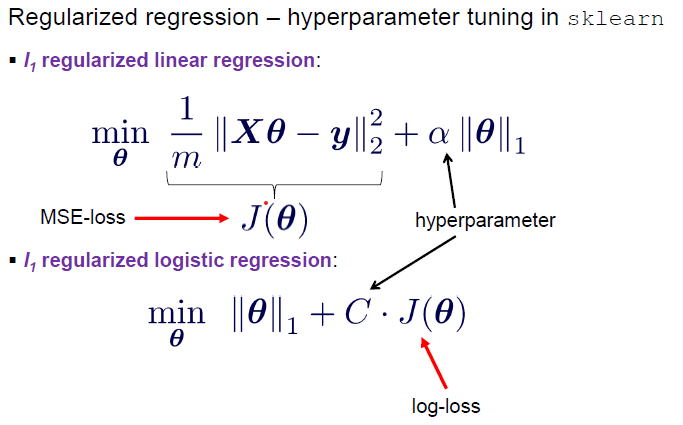

Source: https://datascienceplus.com/lasso-regression-in-python/

In [75]:
# Initializing the Lasso variable and fitting it with out feature and target data. Choose a random value of alpha here for now
model_lasso = Lasso(alpha = 1, random_state=5).fit(feature_data, target_merged)  

# Using .coef_ attribute to give a correlation between the features
coef = pd.Series(model_lasso.coef_, index = feature_data.columns)
print (coef.head())

# Eliminate the features whose correlation value is 0 and keep the other features
print("\nLasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables\n")


# Initializing SelectFromModel to easily select the features from our Lasso Model
sfm = SelectFromModel(model_lasso)

# Training the selector on our feature and target data
sfm.fit(feature_data, target_merged)

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(col_feat[feature_list_index])

# New feature data with selected features stored here
feature_data_selected=feature_data[feature_data.columns[(sfm.get_support())]]

Q1_Male                        5.759523
Q1_Prefer not to say           0.000000
Q1_Prefer to self-describe     0.000000
Q2_22-24                     -47.392778
Q2_25-29                     -42.850717
dtype: float64

Lasso picked 80 variables and eliminated the other 380 variables

Q1_Male
Q2_22-24
Q2_25-29
Q2_30-34
Q2_40-44
Q2_45-49
Q2_50-54
Q2_55-59
Q2_60-69
Q3_Australia
Q3_Canada
Q3_India
Q3_Russia
Q3_Switzerland
Q3_United States of America
Q4_Master’s degree
Q5_Computer science (software engineering, etc.)
Q5_Engineering (non-computer focused)
Q6_Chief Officer
Q6_Consultant
Q6_Data Analyst
Q6_Manager
Q6_Research Assistant
Q6_Student
Q7_Accounting/Finance
Q7_Computers/Technology
Q7_I am a student
Q8_1-2
Q8_10-15
Q8_15-20
Q8_2-3
Q8_20-25
Q8_30 +
Q8_5-10
Q10_No (we do not use ML methods)
Q10_We have well established ML methods (i.e., models in production for more than 2 years)
Q12_MULTIPLE_CHOICE_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)
Q24_10-20 years
Q24_20-30 years
Q

**We have eliminated the features irrelevant to our target variable. Now, we move on to Scaling our Data and PCA to reduce the dimensionality**

### 2. Standard Scaling to perform Principal Component Analysis subsequently

***Standard Scaling***

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization

StandardScaler function standardizes features by removing the mean and scaling to unit variance. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values (mean is already subtracted) of each feature by its standard deviation.

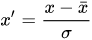

Source: https://en.wikipedia.org/wiki/Feature_scaling

***Principal Component Analysis***

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. 

This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. 

The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. 

PCA is sensitive to the relative scaling of the original variables. Hence, we perform Standard Scaling first to prevent the sensitivity

Source: https://en.wikipedia.org/wiki/Principal_component_analysis

In [76]:
# Initializing the StandardScaler variable and fitting+transforming selected feature dataset

scaler = StandardScaler()
X2 = scaler.fit_transform(feature_data_selected)

# Taking 99% explained variance from the Scaled and Selected feature dataset

pca = PCA(n_components=0.99,random_state=0)
X = pca.fit_transform(X2)

X.shape   # This is the Scaled and Dimensionally-reduced feature dataet

D:\Users\anmol\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Users\anmol\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(15424, 77)

In [77]:
y=target_merged
y.shape  # Checking to see the shape if it matched with our feature data

(15424,)

Text(0, 0.5, 'Cumulative Explained Variance')

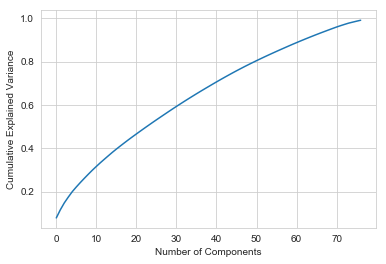

In [78]:
# We plot explained variance vs number of components to show the reason of choosing 99% as explained variance

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

**As is visible from the graph, we find maximum explained variance when we have the highest number of components. Thus, the accuracy decreases as we decrease the number of components. Therefore, in order to get maximum accuracy out of our model, we choose 99% of cumulative explained variance**

#### We are ready now with our feature and target data to start implementing Logistic Regression model

# Part D: Model Implementation

### 1. Splitting the dataset into training and testing dataset

#### The testing dataset will be tested against in the final section i.e. Testing & Discussion

In [135]:
# 70% training and 30% testing dataset
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.3, random_state=1)

### 2. Building Logistic Regression Model

**Parameters applied -  'multinomial' as class, 'lbfgs'  as solver, 'C' as 1, and penalty as 'l2'**

**Applying 10 cross-fold validation to minimize error**

In [80]:
kfold = KFold(n_splits=10,random_state=5)  # Using 10 folds for cross-validation
kfold.get_n_splits(X_train_split)

# Initializing empty arrays to store values from kfold validations
accuracy_test = np.zeros(10)
accuracy_train = np.zeros(10)
recall=np.zeros(10)
precision=np.zeros(10)
f1_score=np.zeros(10)

trainErr2=np.zeros(10)
testErr2=np.zeros(10)

np_idx = 0   # Index value to store value at

y_train_split=np.array(y_train_split)

# Initializing LogisticRegression function with some set parameters
LR_model = LogisticRegression(multi_class='ovr',solver='lbfgs',penalty='l2',C=1,max_iter=500)

# Running loop here to run validations
for train_idx, test_idx in kfold.split(X_train_split):
    
    # Dividing X_train_split into further training and testing for each validation
    X_train, X_test = X_train_split[train_idx], X_train_split[test_idx] 
    
    # Dividing y_train_split into further training and testing for each validation
    y_train, y_test = y_train_split[train_idx], y_train_split[test_idx] 

    LR_model.fit(X_train, y_train) # Fitting the model in training dataset divided above

    # predict function gives the exact class a particular datapoint belongs to (required for calculating accuracy and related metrics)
    predictions_test_predicted = LR_model.predict(X_test)  # predicting for test part
    predictions_train_predicted = LR_model.predict(X_train)  # predicting for train part

    # Computing the confusion matrix
    CM=confusion_matrix(y_test, predictions_test_predicted)

    ACC_test=accuracy_score(y_test,predictions_test_predicted)  # Computing accuracy of testing dataset
    ACC_train=accuracy_score(y_train,predictions_train_predicted)   # Computing accuracy of training dataset

    accuracy_test[np_idx] = ACC_test*100               # Storing testing accuracy in the array
    accuracy_train[np_idx] = ACC_train*100             # Storing training accuracy in the array
    
    recall[np_idx] = recall_score(y_test, predictions_test_predicted, average='macro')  # Computing recall value
    
    precision[np_idx] = precision_score(y_test, predictions_test_predicted, average='macro')   # Computing precision value
    
    f1_score[np_idx]=2*precision[np_idx]*recall[np_idx]/(precision[np_idx]+recall[np_idx])   # Computing f1-score

    np_idx += 1
    
    # Print Accuracy at each fold for both Test and Train Data
    print ("For Test Data: Fold {}: Accuracy: {}%".format(np_idx, round(ACC_test*100,3)))   
    print ("For Train Data: Fold {}: Accuracy: {}%".format(np_idx, round(ACC_train*100,3)))  

    
## For the given set of hyper-parameters, we print the average test and training accuracy 
## as well as other metrics such as Precison, Recall and F1-Score

print ("\nAverage Test Score: {}%({}%)".format(round(np.mean(accuracy_test),3),round(np.std(accuracy_test),3)))

print ("\nAverage Train Score: {}%({}%)".format(round(np.mean(accuracy_train),3),round(np.std(accuracy_train),3)))

print ("\nAverage Precision: {}%({}%)".format(round(np.mean(precision)*100,3),round(np.std(precision),3)))

print ("\nAverage Recall: {}%({}%)".format(round(np.mean(recall)*100,3),round(np.std(recall),3)))

print ("\nAverage F1 Score: {}%({}%)".format(round(np.mean(f1_score)*100,3),round(np.std(f1_score),3)))

For Test Data: Fold 1: Accuracy: 45.926%
For Train Data: Fold 1: Accuracy: 48.477%
For Test Data: Fold 2: Accuracy: 48.148%
For Train Data: Fold 2: Accuracy: 48.364%
For Test Data: Fold 3: Accuracy: 43.889%
For Train Data: Fold 3: Accuracy: 48.178%
For Test Data: Fold 4: Accuracy: 46.389%
For Train Data: Fold 4: Accuracy: 48.312%
For Test Data: Fold 5: Accuracy: 42.87%
For Train Data: Fold 5: Accuracy: 48.93%
For Test Data: Fold 6: Accuracy: 45.0%
For Train Data: Fold 6: Accuracy: 48.477%
For Test Data: Fold 7: Accuracy: 46.617%
For Train Data: Fold 7: Accuracy: 48.204%
For Test Data: Fold 8: Accuracy: 47.359%
For Train Data: Fold 8: Accuracy: 48.05%
For Test Data: Fold 9: Accuracy: 47.266%
For Train Data: Fold 9: Accuracy: 48.379%
For Test Data: Fold 10: Accuracy: 45.783%
For Train Data: Fold 10: Accuracy: 48.297%

Average Test Score: 45.925%(1.544%)

Average Train Score: 48.367%(0.226%)

Average Precision: 35.991%(0.016%)

Average Recall: 35.819%(0.008%)

Average F1 Score: 35.898%(0.

#### To find out how our model is performing with respect to bias-variance trade-off, we build the learning curve

***Learning Curve***

Learning curves show the relationship between training set size and your chosen evaluation metric (e.g. RMSE, accuracy, etc.) on your training and validation sets. They can be an extremely useful tool when diagnosing your model performance, as they can tell you whether your model is suffering from bias or variance.

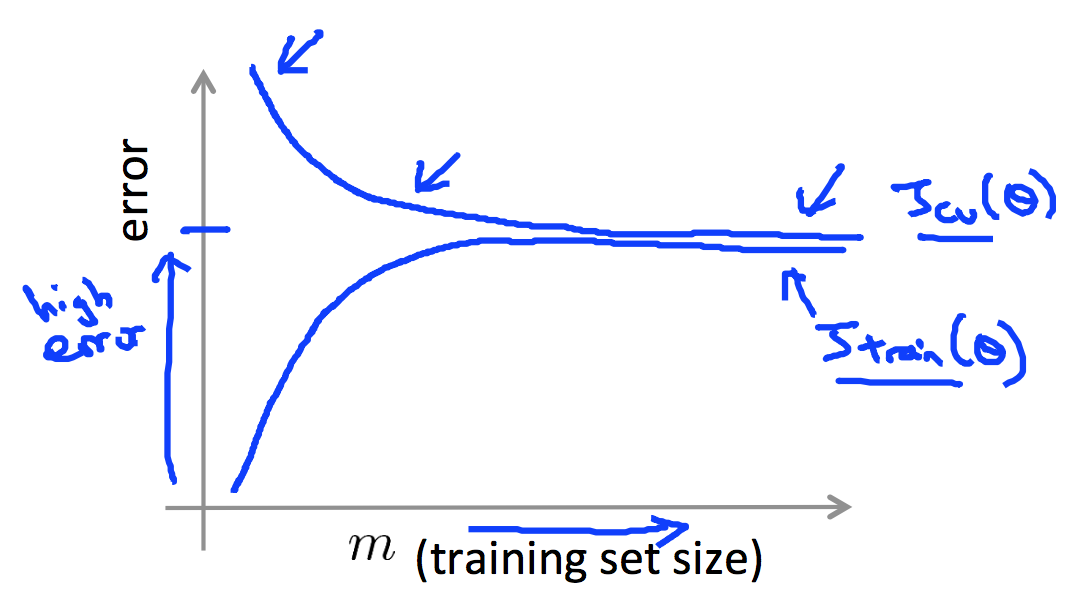

If your learning curves look like this, it means your model is suffering from high bias. Both the training and validation (or cross-validation) error is high and it doesn’t seem to improve with more training examples. The fact that your model is performing similarly bad for both the training and validation sets suggests that the model is underfitting the data and therefore has high bias.

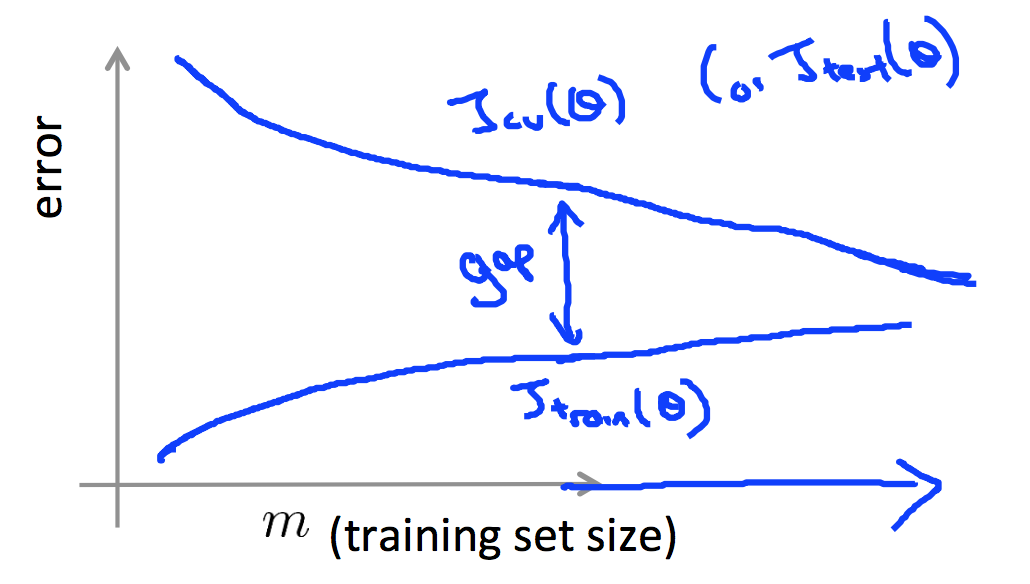

On the other hand, if your learning curves look like this, your model might have a high-variance problem. In this chart, the validation error is much higher than the training error, which suggests that you are overfitting the data.

Source: https://medium.com/@datalesdatales/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53

In [81]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
    return plt

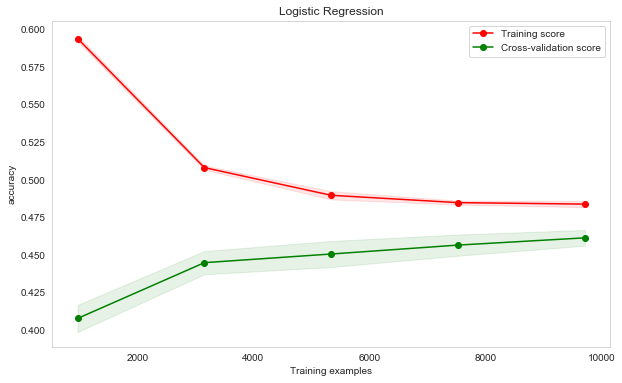

<module 'matplotlib.pyplot' from 'D:\\Users\\anmol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [82]:
plot_learning_curve(LR_model,'Logistic Regression', X_train_split, y_train_split, cv=10)

**As our learning curve has enough gap, it doesn't seem to be affected by either bias or variance in a high degree. However, the accuracy comes to about 50% only**

##### Now, to show how predict_proba works, we will call its function and oberve the outcome value of the first set of datapoints

In [83]:
pred_on_training_data=LR_model.predict_proba(X_train_split)

prediction_table=pd.DataFrame(pred_on_training_data, columns=LR_model.classes_)

prediction_table.iloc[0:1,:]

,10.0,20.0,30.0,50.0,70.0,100.0,500.0
0,0.681372,0.181333,0.049734,0.05638,0.024276,0.006659,0.000248


##### predict_proba gives the probability of the set of datapoints to belong in each of the classes. Here, the values represent the probability that the first set of datapoints belongs to each of the classes - (10, 20, 30,.... 100, 500)

#### Now that we have built our model, tested its accuracy and calculated the relevant metrics, we will now tune our model by finding the best set of hyper-parameters that gives us the final optimal model.

##### Note: Accuracy achieved: 45.92%

# Part E: Model Tuning

### 1. Finding the best value of hyper-parameters

#### The hyper-parameters to be tuned are -

1. From Lasso Regression : value of **alpha** (value of penalty (called λ) that determines which features to be kept and which ones to be eliminated)
2. From Logistic Regression : type of **solver** (various solvers work by their own algorithm and this can be tuned to find which algorith works best for our mode)
3. From Logistic Regression : value of **C** (the inverse of penalty term (λ) that regulates overfitting of the model)

**The method of tuning alpha will be through GridSearchCV Function. The other two hyper-parameters will be tuned through a loop as we will be looking at bias-variance trade-off through the variation of value of C**

***GridSearchCV***

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model.It will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid

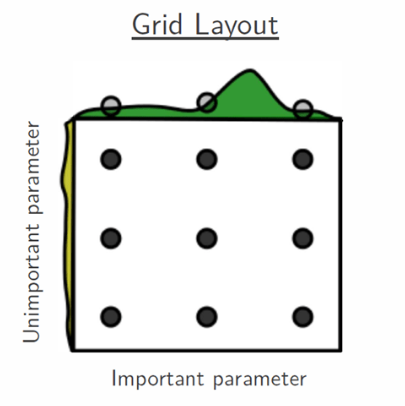

Source: https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models

##### For a range of values of alpha, GridSearchCV will check which value fits best with our dataset and give out the best score and its respective alpha value

In [84]:
lasso_opt = Lasso(max_iter=1000)   # Initializing a Lasso variable to optimize

parameters = {'alpha': [0.0001,0.001,0.01,0.05,0.1,0.5,1,5]}   # Setting up the range of values of alpha

lasso_regressor = GridSearchCV(lasso_opt, parameters, cv = 5,verbose=True)  # Initializing the GridSearchCV variable with our estimator and parameters

lasso_regressor.fit(feature_data, target_merged)  # Fitting to check which parameter works best with our dataset

print (lasso_regressor.best_score_,lasso_regressor.best_params_)   # Printing the best score and best parameter

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.9min finished


0.44539235184856313 {'alpha': 0.1}


**Note: Tuned value of alpha in Lasso Regression : 0.1**

Just to check if number of components that we chose in PCA was optimum, we run a Pipeline with GridSearchCV to check both PCA and Logistic Regression in tandem to each other

***Pipeline***

The Pipeline constructor from sklearn allows you to chain transformers and estimators together into a sequence that functions as one cohesive unit. For example, if your model involves feature selection, standardization, and then regression, those three steps, each as it's own class, could be encapsulated together via Pipeline

Source: https://gist.github.com/amberjrivera/8c5c145516f5a2e894681e16a8095b5c

In [89]:
PCA=PCA()

Log_Reg=LogisticRegression(multi_class='multinomial',max_iter=200,penalty='l2')

steps = [('PCA', PCA), ('Log_Reg', Log_Reg)]

pipeline = Pipeline(steps)

parameters = {'PCA__n_components': [0.9, 0.95, 0.99], 'Log_Reg__C' : [0.01,0.05,0.1,0.5,1,5] , 'Log_Reg__solver' : ['newton-cg','lbfgs','sag','saga']}

CV = GridSearchCV(pipeline, parameters, cv=5, n_jobs= -1, verbose=True)
CV.fit(feature_data, target_merged)  

print('Best score and parameter combination = ')

print(CV.best_score_)    
print(CV.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 34.3min finished


Best score and parameter combination = 
0.4690741701244813
{'Log_Reg__C': 1, 'Log_Reg__solver': 'lbfgs', 'PCA__n_components': 0.99}


**As described earlier through explained variance graph, we find that the best fit for no of components is when we take 99% explained variance**

**Now, we will tune hyper-parameters in Logistic Regression through manual gridsearch. We do it manually to plot the training and testing error curves against different values of C**

In [113]:
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

LR_model_tuned = LogisticRegression(multi_class='multinomial')
scaler_tuned = StandardScaler()

best_model = LR_model_tuned
best_params = {}
best_accuracy = 0
best_std = 0
best_precision = 0
best_recall = 0
best_f1_score = 0

# Declaring empty arrays to store respective values for each set of hyper-parameters

trainErr_loop=np.zeros(40)  # For storing training error
testErr_loop=np.zeros(40)  # For storing testing error

accuracy = np.zeros(40)  # For storing accuracy
recall = np.zeros(40)  # For storing recall
precision = np.zeros(40)  # For storing precision
f1_score = np.zeros(40)  # For storing f1-score

np_idx=0

target_merged=np.array(target_merged)

## For below values of C and solvers in Logistic Regression, we will run the CV loop and find the best model and hyper-parameters

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10,100,1000]:
    for solver in ['newton-cg','lbfgs','sag','saga']:
        
        # # Declaring empty arrays to store respective values for each run of CV
        
        LR_model_tuned = LogisticRegression(multi_class='ovr',C=C, solver=solver,max_iter=1000)
        
        X2_train, X2_test, y2_train, y2_test = train_test_split(feature_data, target_merged, test_size=0.3, random_state=1)
        
        LR_model_tuned.fit(X2_train, y2_train)
            
            # predict function gives the exact class a particular datapoint belongs to (required for calculating accuracy and related metrics)                                    
        predictions_tr = LR_model_tuned.predict(X2_train)  
        predictions_tst = LR_model_tuned.predict(X2_test)   
            
            # predict function gives the probability of the datapoint belonging to each class (required for calculating log-loss)                                
        predictions_tr_err = LR_model_tuned.predict_proba(X2_train)
        predictions_tst_err = LR_model_tuned.predict_proba(X2_test)   

        CM=confusion_matrix(y2_test, predictions_tst)  # Computing confusion matrix
    
        ACC=accuracy_score(y2_test, predictions_tst)  # Computing accuracy using accuracy_score function
         
        recall[np_idx] = recall_score(y2_test, predictions_tst, average='macro')  # Computing recall value using recall_score function
    
        precision[np_idx] = precision_score(y2_test, predictions_tst, average='macro')   # Computing precision value using precision_score function

        f1_score[np_idx]=2*precision[np_idx]*recall[np_idx]/(precision[np_idx]+recall[np_idx])  # Computing f1 score
        
        accuracy[np_idx] = ACC*100
            
        trainErr_loop[np_idx] = np.mean(log_loss(y2_train, predictions_tr_err))  # Computing mean of log loss of training datset
        testErr_loop[np_idx] = np.mean(log_loss(y2_test, predictions_tst_err))  # Computing mean of log loss of testing datset
        
        ## Here we check for best accuracy and store the model type and parameters if it exceeds the previous value                                    
        if accuracy.max() >= best_accuracy:
            best_model = LR_model_tuned
            best_params = {'C':C, 'solver':solver}
            best_accuracy = accuracy[np_idx]
            best_precision = precision[np_idx]
            best_recall = recall[np_idx]
            best_f1_score = f1_score

        np_idx += 1   
        
print (best_params)
                                            
print ("\nBest Accuracy: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

# print ("\nBest Precision: {}%({}%)".format(round((best_precision)*100,3)))
# print ("\nBest Recall: {}%({}%)".format(round((best_recall)*100,3)))
# print ("\nBest F1 Score: {}%({}%)".format(round((best_f1_score),3)))

{'C': 1000, 'solver': 'saga'}

Best Accuracy: 46.564%(0%)

The optimal log model uses C=1000, and a saga solver, and has a cross validation score of 46.564% with a standard deviation of 0%


IndexError: tuple index out of range

#### Please ignore the error above, the error is due to a format mistake which I have corrected in below code. The above code takes too long to run, so I have the correction separately

In [115]:
print ("\nBest Precision: {}%".format(round((best_precision)*100,3)))
print ("\nBest Recall: {}%".format(round((best_recall)*100,3)))
print ("\nBest F1 Score: {}%".format(round((best_f1_score),3)))


Best Precision: 37.827%

Best Recall: 38.151%

Best F1 Score: 0.38%


**The best model hyper-parameter are:- C = 1000 , solver = saga**

In [116]:
## Creating a matrix for training and testing error for each set of hyper-parameter

index = [0.001,0.01,0.05,0.1,0.5,1,5,10,100,1000]
columns = ['newton-cg','lbfgs','sag','saga']

testErr_loop=pd.DataFrame(testErr_loop.reshape(10,4),index = index, columns=columns)
trainErr_loop=pd.DataFrame(trainErr_loop.reshape(10,4),index = index, columns=columns)
print(trainErr_loop,'\n',testErr_loop)

          newton-cg     lbfgs       sag      saga
0.001      1.583895  1.583889  1.583895  1.583895
0.010      1.345769  1.345768  1.345770  1.345778
0.050      1.218753  1.218744  1.218760  1.218781
0.100      1.177953  1.177978  1.177968  1.177993
0.500      1.118126  1.118160  1.118192  1.118301
1.000      1.105092  1.105111  1.105156  1.105256
5.000      1.091926  1.091915  1.092095  1.092221
10.000     1.089947  1.089967  1.090160  1.090416
100.000    1.088067  1.088147  1.088439  1.089144
1000.000   1.087904  1.088012  1.088323  1.089046 
           newton-cg     lbfgs       sag      saga
0.001      1.601733  1.601726  1.601733  1.601733
0.010      1.419411  1.419407  1.419410  1.419409
0.050      1.361638  1.361637  1.361639  1.361641
0.100      1.353164  1.353173  1.353166  1.353170
0.500      1.362473  1.362491  1.362472  1.362472
1.000      1.374133  1.374157  1.374123  1.374091
5.000      1.403620  1.403717  1.403515  1.403345
10.000     1.414058  1.414032  1.413772  1.41314

In [129]:
print(trainErr_loop + testErr_loop)

          newton-cg     lbfgs       sag      saga
0.001      3.185628  3.185615  3.185628  3.185628
0.010      2.765180  2.765175  2.765180  2.765187
0.050      2.580391  2.580381  2.580399  2.580422
0.100      2.531116  2.531152  2.531134  2.531164
0.500      2.480599  2.480651  2.480665  2.480773
1.000      2.479224  2.479268  2.479279  2.479346
5.000      2.495546  2.495631  2.495610  2.495566
10.000     2.504004  2.503999  2.503932  2.503559
100.000    2.526338  2.526232  2.520713  2.515601
1000.000   2.543846  2.534361  2.523621  2.517222


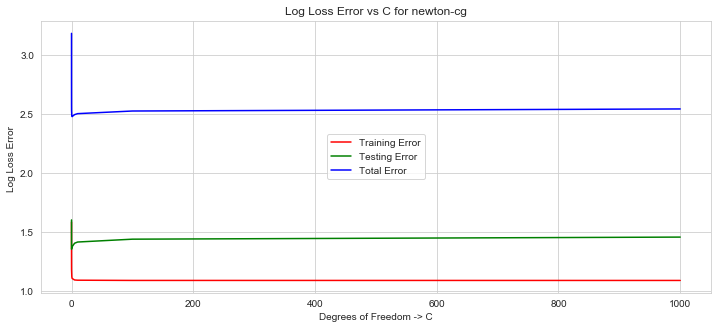

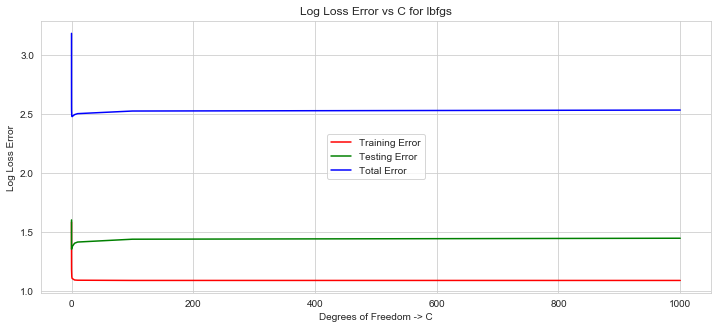

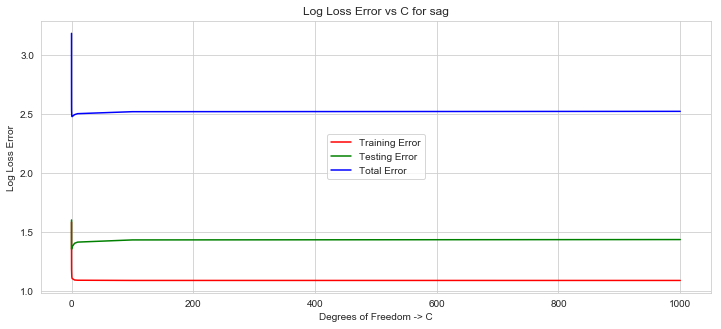

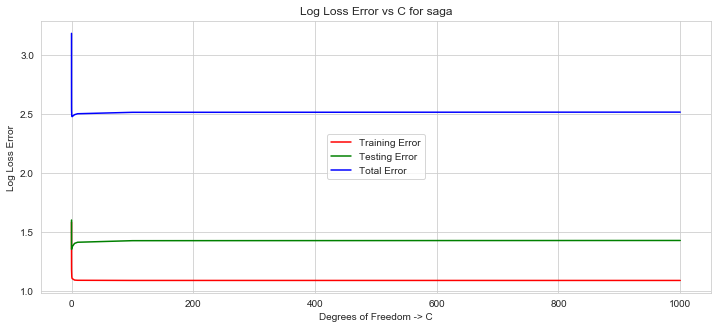

In [117]:
## Plotting the curve of Log-Loss Error (both training and testing) vs values of C for a particular solver type

solver_type =['newton-cg','lbfgs','sag','saga']

for i in range(1,5):
    plt.figure(figsize=(12,5))
    plt.plot(trainErr_loop.iloc[:,i-1:i],'r',label='Training Error')
    plt.plot(testErr_loop.iloc[:,i-1:i],'g',label='Testing Error')
    plt.plot(trainErr_loop.iloc[:,i-1:i] + testErr_loop.iloc[:,i-1:i], 'b', label='Total Error')

    test_loss_min = testErr_loop.iloc[:,i-1:i].min()
    train_test_loss_min=(trainErr_loop.iloc[:,i-1:i] + testErr_loop.iloc[:,i-1:i]).min()

    deg_min = np.array(testErr_loop.iloc[:,i-1:i]).argmin()
    total_deg_min = np.array((trainErr_loop.iloc[:,i-1:i] + testErr_loop.iloc[:,i-1:i])).argmin()

    plt.title("Log Loss Error vs C for " + solver_type[i-1])
    plt.xlabel("Degrees of Freedom -> C")
    plt.ylabel("Log Loss Error ")
    plt.legend(loc=10)

**As we have found the minimum value of training and testing error, we are on the point where we are getting least bias and variance. The leftmost point in the graph is where there is maximum bias and minimum variance and the rightmost point works in opposite to that**

**In the middle where we have minimum error, there is a 'trade-off' between the bias and variance**

# Part F: Testing & Discussion

#### Now that the model is tuned, we can implement it on our training and testing datasets and analyse our findings.

**Below is a function compiled to perform feature selection, scaling, PCA and model implementation based on the hyper-parameters provided to it. We will call the function to test on our training and testing dataset with the tuned hyper-parameters**

In [140]:
def compiled_model(feature_data,target,alpha=0.1, n_components=0.99, C=1000, solver='saga'):
    
    feature_data=pd.DataFrame(feature_data)
    
    model_lasso = Lasso(alpha = alpha, random_state=5).fit(feature_data, target)

    coef = pd.Series(model_lasso.coef_, index = feature_data.columns)
    coef.head()

    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

    sfm = SelectFromModel(model_lasso)

    # Train the selector
    sfm.fit(feature_data, target)

    # New feature data with selected features
    feature_data_selected=feature_data[feature_data.columns[(sfm.get_support())]]
    
    scaler = StandardScaler()
    X2 = scaler.fit_transform(feature_data_selected)

    pca = PCA(n_components=n_components,random_state=0)
    X = pca.fit_transform(X2)
    X.shape
    
    kfold = KFold(n_splits=10,random_state=5)
    kfold.get_n_splits(X)

    accuracy_test = np.zeros(10)
    accuracy_train = np.zeros(10)
    recall=np.zeros(10)
    precision=np.zeros(10)
    f1_score=np.zeros(10)

    np_idx = 0

    target=np.array(target)

    LR_model = LogisticRegression(multi_class='ovr',C=C,solver=solver,penalty='l2',max_iter=1000)

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = target[train_idx], target[test_idx]

        LR_model.fit(X_train, y_train)

        predictions_test = LR_model.predict(X_test)
        predictions_train = LR_model.predict(X_train)

        CM=confusion_matrix(y_test, predictions_test)

        ACC_test=accuracy_score(y_test,predictions_test)

        ACC_train=accuracy_score(y_train,predictions_train)

        recall[np_idx] = recall_score(y_test, predictions_test, average='macro')  # Computing recall value
    
        precision[np_idx] = precision_score(y_test, predictions_test, average='macro')   # Computing precision value

        f1_score[np_idx]=2*precision[np_idx]*recall[np_idx]/(precision[np_idx]+recall[np_idx])

        accuracy_test[np_idx] = ACC_test*100
        accuracy_train[np_idx] = ACC_train*100

        np_idx += 1

        print ("For **Test Data**: Fold {}: Accuracy: {}%".format(np_idx, round(ACC_test*100,3)))   

        print ("For **Train Data**: Fold {}: Accuracy: {}%".format(np_idx, round(ACC_train*100,3)))  

    print ("\nAverage Test Score: {}%({}%)".format(round(np.mean(accuracy_test),3),round(np.std(accuracy_test),3)))
    print ("\nAverage Train Score: {}%({}%)".format(round(np.mean(accuracy_train),3),round(np.std(accuracy_train),3)))
    print ("\nAverage Precision: {}%({}%)".format(round(np.mean(precision)*100,3),round(np.std(precision),3)))
    print ("\nAverage Recall: {}%({}%)".format(round(np.mean(recall)*100,3),round(np.std(recall),3)))
    print ("\nAverage F1 Score: {}%({}%)".format(round(np.mean(f1_score)*100,3),round(np.std(f1_score),3)))
    
    return X_train_split, X_test_split, y_train_split, y_test_split, ACC, CM

In [143]:
# Splitting the dataset again to implement our model

# 70% training and 30% testing
X_train_split2, X_test_split2, y_train_split2, y_test_split2 = train_test_split(feature_data, target_merged, test_size=0.3, random_state=1)

In [145]:
warnings.filterwarnings("ignore")

# Running on training dataset

_,_,_,_,_,_ = compiled_model(X_train_split2,y_train_split2,alpha=0.1, n_components=0.99, C=1000, solver='lbfgs')

Lasso picked 317 variables and eliminated the other 143 variables
For **Test Data**: Fold 1: Accuracy: 46.944%
For **Train Data**: Fold 1: Accuracy: 55.434%
For **Test Data**: Fold 2: Accuracy: 49.815%
For **Train Data**: Fold 2: Accuracy: 55.414%
For **Test Data**: Fold 3: Accuracy: 46.296%
For **Train Data**: Fold 3: Accuracy: 56.145%
For **Test Data**: Fold 4: Accuracy: 49.537%
For **Train Data**: Fold 4: Accuracy: 55.784%
For **Test Data**: Fold 5: Accuracy: 44.722%
For **Train Data**: Fold 5: Accuracy: 56.083%
For **Test Data**: Fold 6: Accuracy: 46.296%
For **Train Data**: Fold 6: Accuracy: 55.62%
For **Test Data**: Fold 7: Accuracy: 48.656%
For **Train Data**: Fold 7: Accuracy: 55.604%
For **Test Data**: Fold 8: Accuracy: 48.563%
For **Train Data**: Fold 8: Accuracy: 55.408%
For **Test Data**: Fold 9: Accuracy: 48.842%
For **Train Data**: Fold 9: Accuracy: 55.449%
For **Test Data**: Fold 10: Accuracy: 47.544%
For **Train Data**: Fold 10: Accuracy: 55.47%

Average Test Score: 47.

##### Note: Accuracy achieved for training: 47.72%

In [147]:
warnings.filterwarnings("ignore")

# Running on testing dataset

_,_,_,_,_,_ = compiled_model(X_test_split2,y_test_split2,alpha=0.1, n_components=0.99, C=1000, solver='lbfgs')

Lasso picked 335 variables and eliminated the other 125 variables
For **Test Data**: Fold 1: Accuracy: 44.276%
For **Train Data**: Fold 1: Accuracy: 63.673%
For **Test Data**: Fold 2: Accuracy: 44.06%
For **Train Data**: Fold 2: Accuracy: 63.169%
For **Test Data**: Fold 3: Accuracy: 41.901%
For **Train Data**: Fold 3: Accuracy: 63.505%
For **Test Data**: Fold 4: Accuracy: 47.3%
For **Train Data**: Fold 4: Accuracy: 63.457%
For **Test Data**: Fold 5: Accuracy: 40.605%
For **Train Data**: Fold 5: Accuracy: 63.529%
For **Test Data**: Fold 6: Accuracy: 41.469%
For **Train Data**: Fold 6: Accuracy: 63.794%
For **Test Data**: Fold 7: Accuracy: 45.572%
For **Train Data**: Fold 7: Accuracy: 63.121%
For **Test Data**: Fold 8: Accuracy: 46.436%
For **Train Data**: Fold 8: Accuracy: 63.481%
For **Test Data**: Fold 9: Accuracy: 46.32%
For **Train Data**: Fold 9: Accuracy: 62.674%
For **Test Data**: Fold 10: Accuracy: 42.208%
For **Train Data**: Fold 10: Accuracy: 63.73%

Average Test Score: 44.015

##### Note: Accuracy achieved for testing : 44.01%
**As the model gives about the same accuracy for both training and testing datasets, so our model is not overfit**

**Let's look at how our model is affected by bias or variance through learning curves**

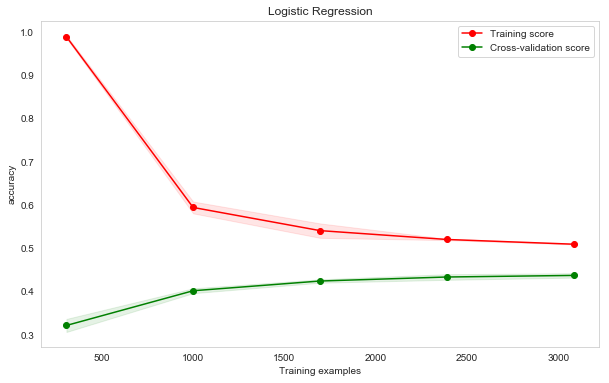

<module 'matplotlib.pyplot' from 'D:\\Users\\anmol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [155]:
## Running on testing dataset

plot_learning_curve(LR_model_tuned,'Logistic Regression', X_test_split, y_test_split, cv=3)

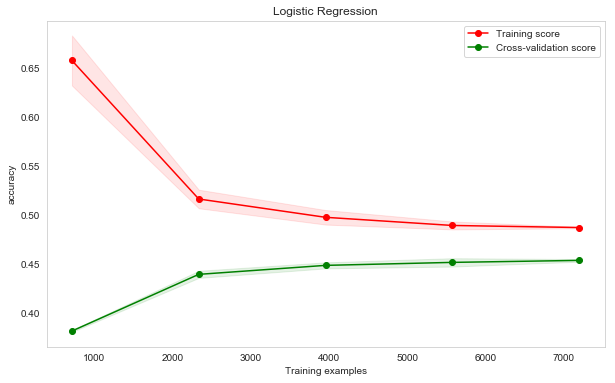

<module 'matplotlib.pyplot' from 'D:\\Users\\anmol\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [157]:
## Running on training dataset

plot_learning_curve(LR_model_tuned,'Logistic Regression', X_train_split, y_train_split, cv=3)

**As both learning curve have enough gap, they don't seem to be affected by either bias or variance at a high degree. However, the accuracy comes to about 50% only. This also shows that our model is not overfit. Due to low accuracy, it could be underfit though**

**Let's look at the probability distribution for particular datapoints from training and testing datasets**

In [149]:
pred_on_training_data=LR_model_tuned.predict_proba(X_train_split2)

prediction_train_table=pd.DataFrame(pred_on_training_data, columns=LR_model_tuned.classes_)

prediction_train_table.iloc[0:1,:]  ## Displaying the probability distribution of the first datapoint from training dataset

,10.0,20.0,30.0,50.0,70.0,100.0,500.0
0,0.374066,0.338829,0.194959,0.081494,0.010111,0.000535,0.000006


In [150]:
pred_on_testing_data=LR_model_tuned.predict_proba(X_test_split2)

prediction_test_table=pd.DataFrame(pred_on_testing_data, columns=LR_model_tuned.classes_)

prediction_test_table.iloc[0:1,:]  ## Displaying the probability distribution of the first datapoint from testing dataset

,10.0,20.0,30.0,50.0,70.0,100.0,500.0
0,0.038544,0.247815,0.25321,0.040224,0.073792,0.213114,0.133302


In [151]:
# Defining brackets to display with the plot
brackets = ['0-10,000','10-20,000', '20-30,000', '30-50,000', '50-70,000', '70-100,000', '100-500k+']

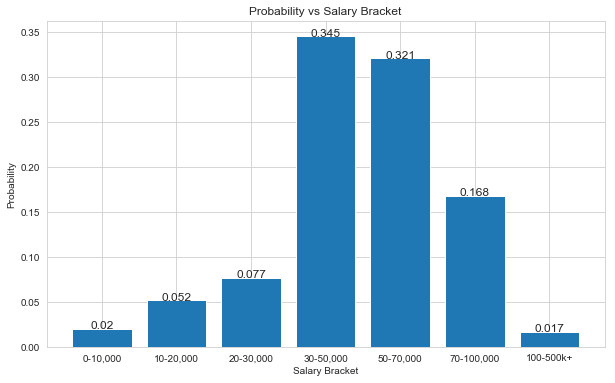

In [152]:
### Here is the probability distribution for a datapoint belonging to training dataset

plt.figure(figsize=(10,6))
plt.bar(brackets, prediction_train_table.loc[100])
plt.xlabel('Salary Bracket')
plt.ylabel('Probability')
plt.title('Probability vs Salary Bracket') 

for a,b in zip(brackets, round(prediction_train_table.loc[100],3)):
    plt.annotate(str(b),(a, b), ha='center',fontsize=12) 

plt.show()

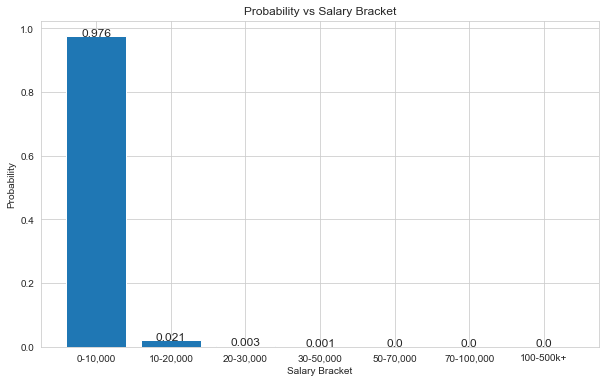

In [159]:
### Here is the probability distribution for a datapoint belonging to testing dataset

plt.figure(figsize=(10,6))
plt.bar(brackets, prediction_test_table.loc[100])
plt.xlabel('Salary Bracket')
plt.ylabel('Probability')
plt.title('Probability vs Salary Bracket')

for a,b in zip(brackets, round(prediction_test_table.loc[100],3)):
    plt.annotate(str(b),(a, b), ha='center',fontsize=12) 

plt.show()

**We now conclude and bring forward some conclusions of this exercise**

1. Preliminary Accuracy : ....%. Tuned Accuracy : ....%
2. The classes/brackets in the target variable i.e. Salary had to be grouped together as some classes didn't have sufficient count to model
3. The overall fit is not so great as we obtain accuracy of about 50%. However, our model is not overfit and we were able to achieve a balance between bias and variance
4. The Log-Loss error vs C values was plotted for each type of solver for showing training and testing error. In the middle where we have minimum error, there is a 'trade-off' between the bias and variance.
5. The accuracy can be increased by further grouping the salary brackets. Also, other feature selection techniques such as RFE and RandomForestClassifier can be applied to check the affect on accuracy and tuning the respective hyper-parameters